## importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# figure size
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
import os
a = os.getcwd()
os.chdir('drive/My Drive/capston/nn')

## importing data

In [5]:
df = pd.read_csv('bank_full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### pandas profiling

In [ ]:
#!pip install pandas-profiling

In [ ]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

## Shape of DataSet

In [7]:
df.shape

(45211, 17)

#### *rows* = 45211 & *columns* = 17

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## check duplicate

In [9]:
df.duplicated().sum()

0

#### no duplicacy

## checking missing values in intial stage

In [10]:
missing_data = pd.DataFrame(df.isnull().sum(), columns = ["Count"])
missing_data["Percentage"] = missing_data["Count"]/len(df) *100
missing_data

,Count,Percentage
age,0,0.000000
job,0,0.000000
marital,0,0.000000
education,0,0.000000
default,0,0.000000
balance,0,0.000000
housing,0,0.000000
loan,0,0.000000
contact,0,0.000000
day,0,0.000000


In [11]:
# 5 point summary of numerical variables
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
# summary of categorical variables
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


#### default, housing, loan and target need to map into [0,1]

In [13]:
data = df.copy()

In [14]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [15]:
print(data['default'].unique())
print(data['housing'].unique())
print(data['loan'].unique())
print(data['Target'].unique())

['no' 'yes']
['yes' 'no']
['no' 'yes']
['no' 'yes']


In [16]:
#data['default'] = data['default'].apply(lambda x: 0 if x=='no' else 1)
#data['housing'] = data['housing'].apply(lambda x: 0 if x=='no' else 1)
#data['loan'] = data['loan'].apply(lambda x: 0 if x=='no' else 1)
data['Target'] = data['Target'].apply(lambda x: 0 if x=='no' else 1)

In [17]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0


In [18]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


## Univariate Analysis

### a) Numerical variables

In [19]:
data_num = data.select_dtypes(include=np.number)
data_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target'],
      dtype='object')

### **'Age'**

In [20]:
data['age'].min()

18

In [21]:
data['age'].max()

95

range of age is 18 to 95

In [22]:
data['age'].describe()

count   45211.000000
mean       40.936210
std        10.618762
min        18.000000
25%        33.000000
50%        39.000000
75%        48.000000
max        95.000000
Name: age, dtype: float64

mean ~= meadian, we can say that nearly normally distributed.

In [23]:
# histogram

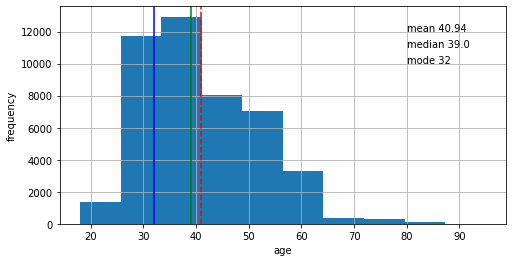

In [24]:
plt.figure(figsize=(8,4))
data['age'].hist()
plt.xlabel('age')
plt.ylabel('frequency')

plt.axvline(data['age'].mean(), color='r', linestyle='--')
plt.axvline(data['age'].median(), color='g', linestyle='-')
plt.axvline(data['age'].mode()[0], color='b', linestyle='-')


plt.text(80,12000, 'mean'+' '+str(round(data['age'].mean(),2)))
plt.text(80,11000, 'median'+' '+str(round(data['age'].median(),2)))
plt.text(80,10000, 'mode'+' '+str(round(data['age'].mode()[0],2)))

plt.show()

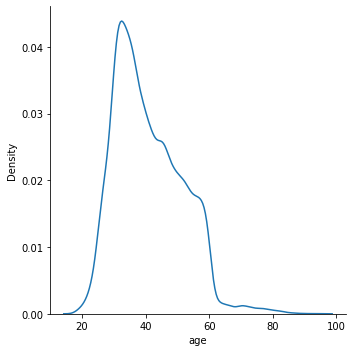

In [25]:
# kde
sns.displot(data['age'], kind='kde')

In [26]:
print('skewness :',data['age'].skew())
print('---------')
print('kurtosis :', data['age'].kurt())

skewness : 0.6848179257252598
---------
kurtosis : 0.3195703759105042


from skew value we can infer that it is +ve skewed and from kurt i.e. +ve which means it is leptokurtic( presence of more extreme observations)

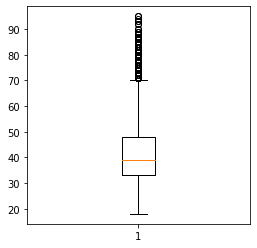

In [27]:
plt.figure(figsize=(4,4))
plt.boxplot(data['age'])
plt.show()

from age boxplot we can make two categories like 18-70 and 70+

### 'balance'

In [28]:
data['balance'].min()

-8019

In [29]:
data['balance'].max()

102127

range of balance: -8019 to 102127

In [30]:
data['balance'].describe()

count    45211.000000
mean      1362.272058
std       3044.765829
min      -8019.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max     102127.000000
Name: balance, dtype: float64

In [31]:
data[data['balance']<=0].shape

(7280, 17)

we have 7280 clients who have balance either 0 or less than 0.

In [32]:
# histogram

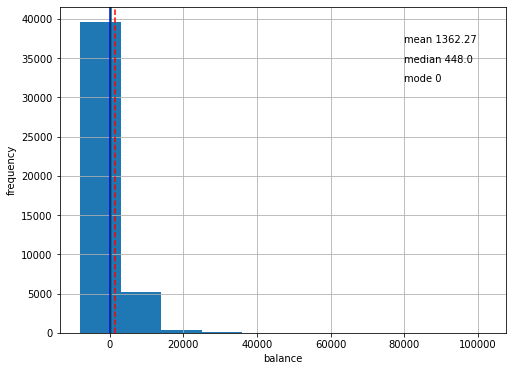

In [33]:
plt.figure(figsize=(8,6))
data['balance'].hist()
plt.xlabel('balance')
plt.ylabel('frequency')

plt.axvline(data['balance'].mean(), color='r', linestyle='--')
plt.axvline(data['balance'].median(), color='g', linestyle='-')
plt.axvline(data['balance'].mode()[0], color='b', linestyle='-')


plt.text(80000,37000, 'mean'+' '+str(round(data['balance'].mean(),2)))
plt.text(80000,34500, 'median'+' '+str(round(data['balance'].median(),2)))
plt.text(80000,32000, 'mode'+' '+str(round(data['balance'].mode()[0],2)))

plt.show()

In [34]:
# kde

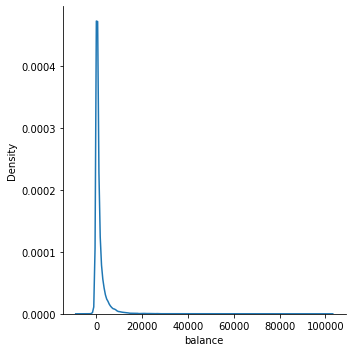

In [35]:
sns.displot(data['balance'], kind='kde')

In [36]:
print('skewness :',data['balance'].skew())
print('--------')
print('kurtosis :',data['balance'].kurt())
print('--------')
print('standard deviation :', data['balance'].std())

skewness : 8.360308326166326
--------
kurtosis : 140.75154662504158
--------
standard deviation : 3044.7658291686002


from skew value we can infer that it is +ve skewed and from kurt i.e. +ve which means it is leptokurtic( presence of more extreme observations) & there is lot of variation.

In [37]:
# boxplot

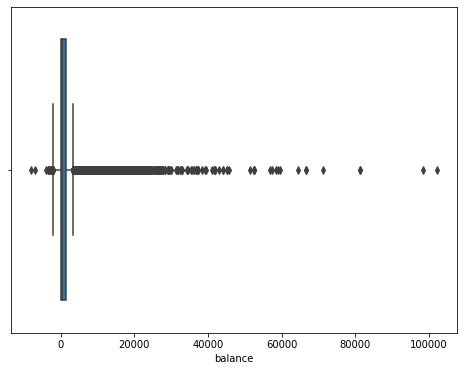

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(data['balance'])

### 'day'

it represent day of month. e.g '11' means 11th of X month

It implicit that range is 1 to 31 (no of days in months)

In [39]:
# histogram

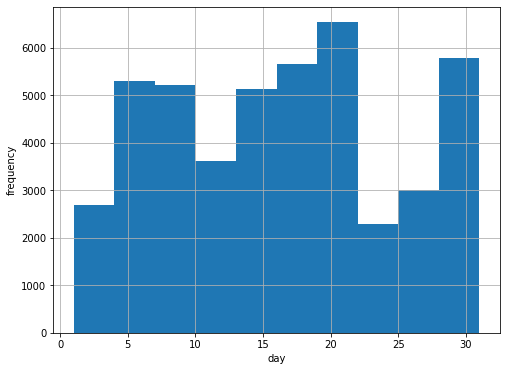

In [40]:
plt.figure(figsize=(8,6))
data['day'].hist()
plt.xlabel('day')
plt.ylabel('frequency')
plt.show()

In [41]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [42]:
# kde 

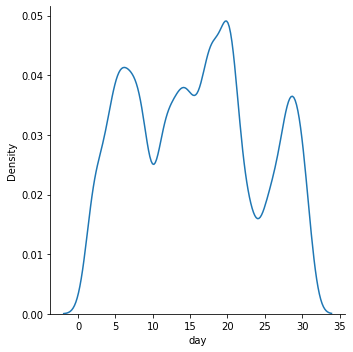

In [43]:
sns.displot(data['day'], kind='kde')

couldn't find any interference from above graph

In [44]:
data['day'].value_counts().sort_values()

1      322
24     447
10     524
31     643
25     840
22     905
23     939
26    1035
3     1079
27    1121
2     1293
16    1415
4     1445
11    1479
9     1561
30    1566
13    1585
12    1603
15    1703
29    1745
19    1757
7     1817
28    1830
8     1842
14    1848
5     1910
6     1932
17    1939
21    2026
18    2308
20    2752
Name: day, dtype: int64

no inference

### 'duration'

In [45]:
data['duration'].min()

0

In [46]:
data['duration'].max()

4918

In [47]:
data['duration'].describe()

count   45211.000000
mean      258.163080
std       257.527812
min         0.000000
25%       103.000000
50%       180.000000
75%       319.000000
max      4918.000000
Name: duration, dtype: float64

In [48]:
data[data['duration']==4918]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,0


In [49]:
data[data['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,0
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,0
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,0


In [50]:
# histogram

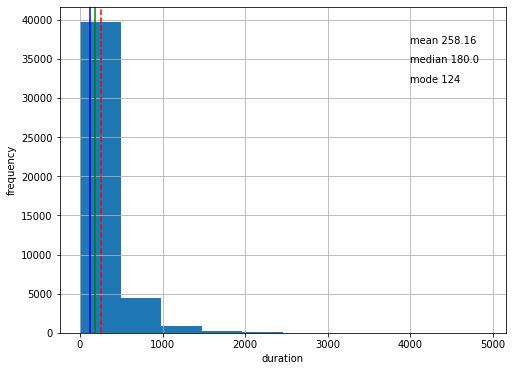

In [51]:
plt.figure(figsize=(8,6))
data['duration'].hist()
plt.xlabel('duration')
plt.ylabel('frequency')

plt.axvline(data['duration'].mean(), color='r', linestyle='--')
plt.axvline(data['duration'].median(), color='g', linestyle='-')
plt.axvline(data['duration'].mode()[0], color='b', linestyle='-')


plt.text(4000,37000, 'mean'+' '+str(round(data['duration'].mean(),2)))
plt.text(4000,34500, 'median'+' '+str(round(data['duration'].median(),2)))
plt.text(4000,32000, 'mode'+' '+str(round(data['duration'].mode()[0],2)))

plt.show()

In [52]:
# kde

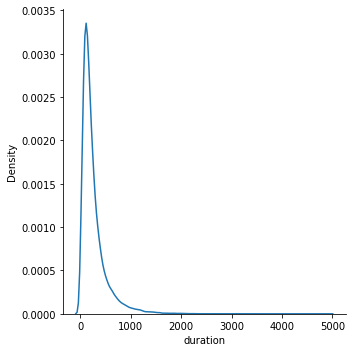

In [53]:
sns.displot(data['duration'], kind='kde')

In [54]:
print('skewness :',data['duration'].skew())
print('--------')
print('kurtosis :',data['duration'].kurt())
print('--------')
print('standard deviation :', data['duration'].std())

skewness : 3.144318099423456
--------
kurtosis : 18.153915269019706
--------
standard deviation : 257.52781226517095


right skewed, kurtosis is +ve means presence of extreme observation & deviation is also present in 'duration'

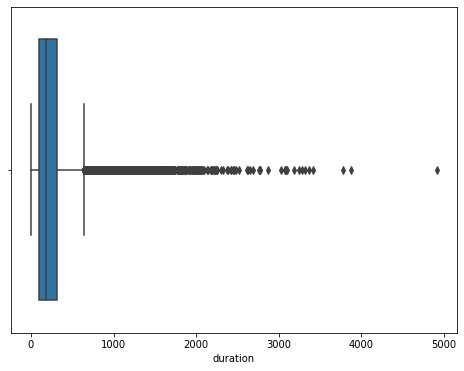

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(data['duration'])

### 'campaign'

 number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [56]:
data['campaign'].describe()

count   45211.000000
mean        2.763841
std         3.098021
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        63.000000
Name: campaign, dtype: float64

min = 1, max = 63, mean = median = 2

In [57]:
# histogram

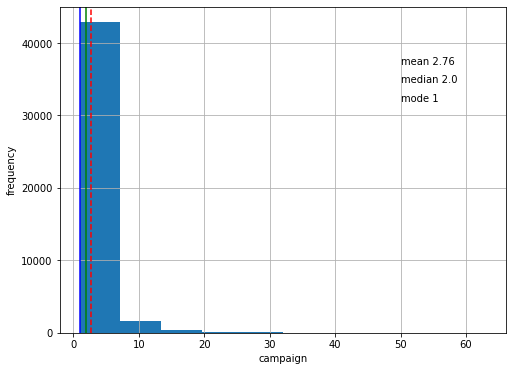

In [58]:
plt.figure(figsize=(8,6))
data['campaign'].hist()
plt.xlabel('campaign')
plt.ylabel('frequency')

plt.axvline(data['campaign'].mean(), color='r', linestyle='--')
plt.axvline(data['campaign'].median(), color='g', linestyle='-')
plt.axvline(data['campaign'].mode()[0], color='b', linestyle='-')


plt.text(50,37000, 'mean'+' '+str(round(data['campaign'].mean(),2)))
plt.text(50,34500, 'median'+' '+str(round(data['campaign'].median(),2)))
plt.text(50,32000, 'mode'+' '+str(round(data['campaign'].mode()[0],2)))

plt.show()

In [59]:
#kde

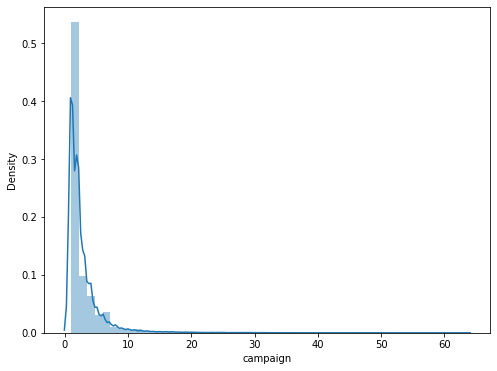

In [60]:
plt.figure(figsize=(8,6))
sns.distplot(data['campaign'])

In [61]:
print('skewness :',data['campaign'].skew())
print('--------')
print('kurtosis :',data['campaign'].kurt())
print('--------')
print('standard deviation :', data['campaign'].std())

skewness : 4.898650166179674
--------
kurtosis : 39.2496508023021
--------
standard deviation : 3.0980208832802205


right skewed, kurt is also +ve means presence of extreme observation & standard deviation is normal

In [62]:
# boxplot

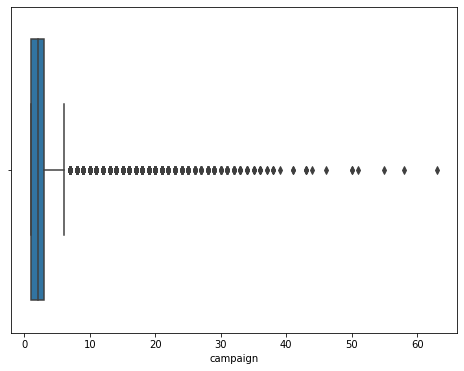

In [63]:
plt.figure(figsize=(8,6))
sns.boxplot(data['campaign'])

### 'pdays'

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [64]:
data['pdays'].describe()

count   45211.000000
mean       40.197828
std       100.128746
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

In [65]:
# histogram

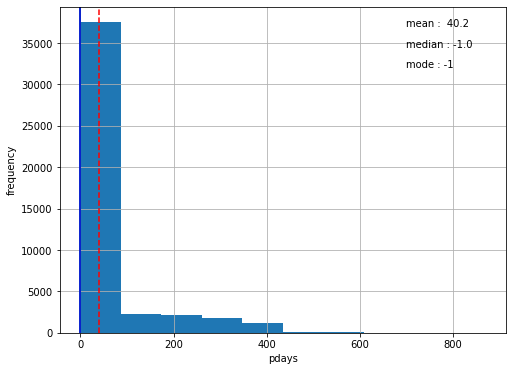

In [66]:
plt.figure(figsize=(8,6))
data['pdays'].hist()
plt.xlabel('pdays')
plt.ylabel('frequency')

plt.axvline(data['pdays'].mean(), color='r', linestyle='--')
plt.axvline(data['pdays'].median(), color='g', linestyle='-')
plt.axvline(data['pdays'].mode()[0], color='b', linestyle='-')


plt.text(700,37000, 'mean : '+' '+str(round(data['pdays'].mean(),2)))
plt.text(700,34500, 'median :'+' '+str(round(data['pdays'].median(),2)))
plt.text(700,32000, 'mode :'+' '+str(round(data['pdays'].mode()[0],2)))

plt.show()
plt.show()

In [67]:
data[data['pdays']==1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29778,41,blue-collar,married,primary,no,201,yes,no,cellular,4,feb,69,1,1,1,success,0
30788,46,entrepreneur,married,secondary,no,122,no,no,cellular,6,feb,1047,2,1,7,failure,0
34437,45,blue-collar,married,secondary,no,640,yes,no,cellular,5,may,214,1,1,1,success,0
44401,62,retired,married,secondary,no,569,no,no,cellular,4,aug,288,1,1,8,success,1
44402,29,management,married,tertiary,no,198,yes,no,cellular,4,aug,453,1,1,1,failure,0
44403,68,retired,married,tertiary,no,2812,no,no,cellular,4,aug,651,1,1,7,success,1
44404,38,management,married,tertiary,no,1199,no,no,cellular,4,aug,178,1,1,1,success,1
44410,78,retired,married,unknown,no,38,no,no,telephone,4,aug,156,1,1,3,other,0
44413,33,technician,married,secondary,no,1026,no,no,cellular,4,aug,87,1,1,5,failure,0
44417,35,management,single,tertiary,no,747,no,no,cellular,4,aug,91,1,1,6,other,0


In [68]:
36954/len(data)*100  # percentage of value '-1' pdays

81.73674548229414

In [69]:
# kde

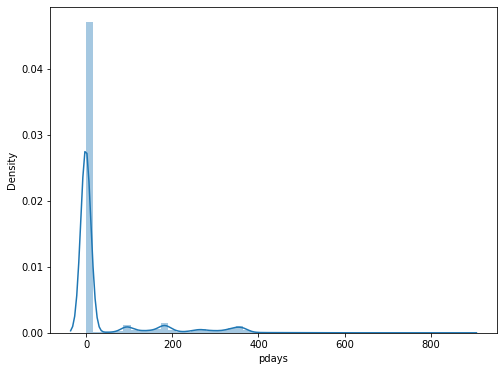

In [70]:
plt.figure(figsize=(8,6))
sns.distplot(data['pdays'])

In [71]:
print('skewness :',data['pdays'].skew())
print('--------')
print('kurtosis :',data['pdays'].kurt())
print('--------')
print('standard deviation :', data['pdays'].std())

skewness : 2.6157154736563477
--------
kurtosis : 6.935195210422799
--------
standard deviation : 100.1287459906047


very high deviation,  highly right skewed and kurt is +ve means presence of extreme observation.

In [72]:
# boxplot

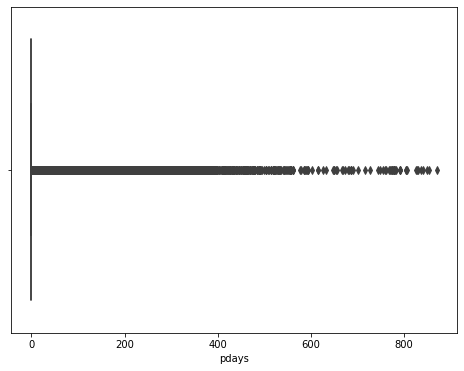

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(data['pdays'])

from above plot we can categories our pdays into 2 or 3 categories

### 'previous'

previous: number of contacts performed before this campaign and for this client (numeric)

In [74]:
data['previous'].describe()

count   45211.000000
mean        0.580323
std         2.303441
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       275.000000
Name: previous, dtype: float64

In [75]:
# kde

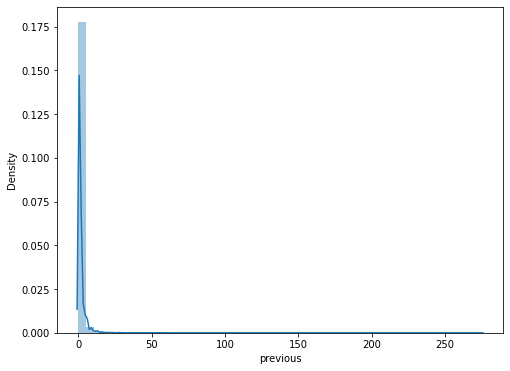

In [76]:
plt.figure(figsize=(8,6))
sns.distplot(data['previous'])

In [77]:
print('skewness :',data['previous'].skew())
print('--------')
print('kurtosis :',data['previous'].kurt())
print('--------')
print('standard deviation :', data['previous'].std())

skewness : 41.84645447266292
--------
kurtosis : 4506.860660183261
--------
standard deviation : 2.3034410449314233


right skewed, high +ve kurtosis means presence of extreme outliers

In [78]:
#boxplot

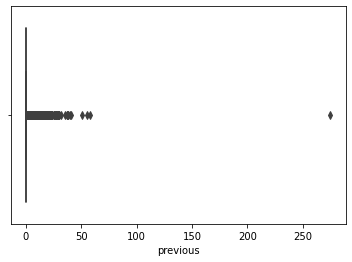

In [79]:
plt.figure(figsize=(6,4))
sns.boxplot(data['previous'])

In [80]:
data[data['previous']>250]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,0


we can manually observe index no. 29182 and find out the anomalies.

### Boolean datatype categories like default , housing , loan , Target

#### 'default'

default: has credit in default? (categorical: 'no':0,'yes':1,'unknown')

In [81]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [82]:
# pie plot

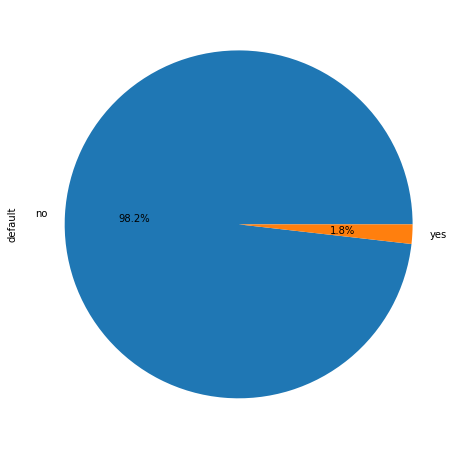

In [83]:
data.default.value_counts().plot(kind='pie',autopct="%.1f%%")

### 'housing'

housing: has housing loan? (categorical: 'no':0 ,'yes':1 ,'unknown')

In [84]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [85]:
# pie plot

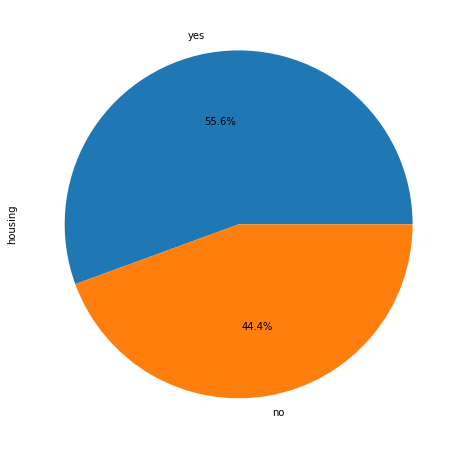

In [86]:
data.housing.value_counts().plot(kind='pie',autopct="%.1f%%")

### 'loan'

In [87]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

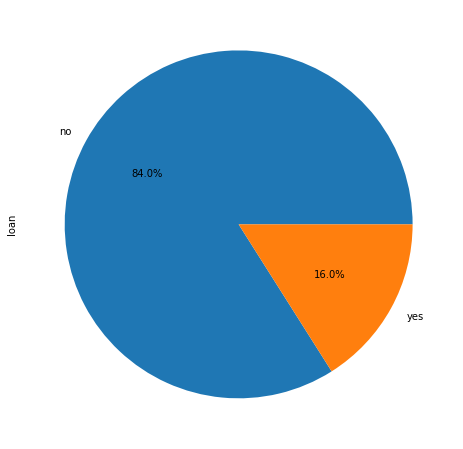

In [88]:
data.loan.value_counts().plot(kind='pie',autopct="%.1f%%")

### 'Target'

In [89]:
data['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

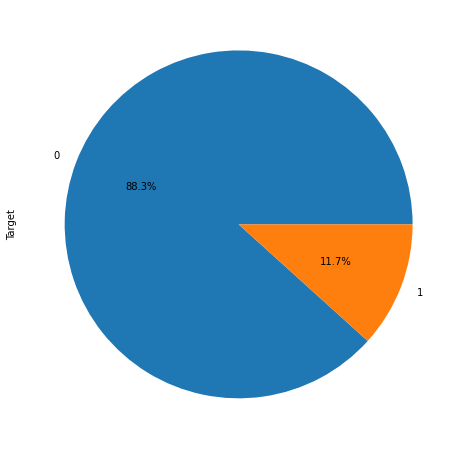

In [90]:
data.Target.value_counts().plot(kind='pie',autopct="%.1f%%")

## b) categorical features

In [91]:
data_cat = data.select_dtypes(include='object')
data_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

### 'job'

 type of job (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')

In [92]:
data['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [93]:
# frequency table

In [94]:
data['job'].value_counts().to_frame(name='Frequency')

,Frequency
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303
housemaid,1240


In [95]:
# countplot

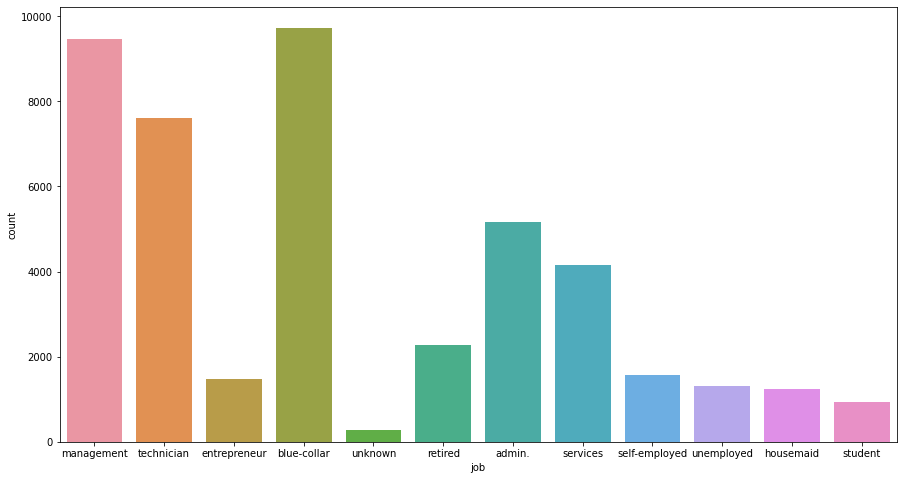

In [96]:

sns.countplot(data['job'])

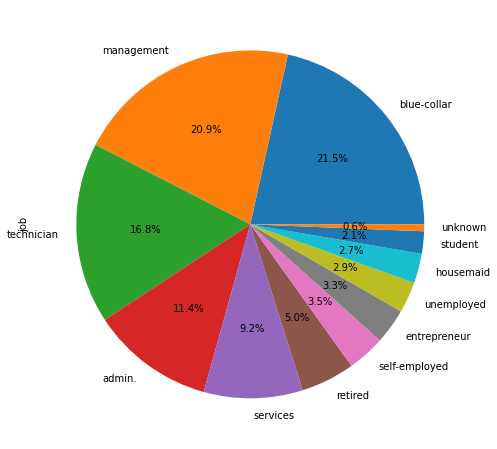

In [97]:
data.job.value_counts().plot(kind='pie',autopct="%.1f%%")

### 'marital'

marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

In [98]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [99]:
# counplot

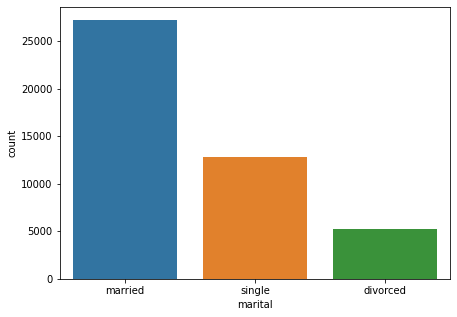

In [100]:
plt.figure(figsize = (7,5))
sns.countplot(data['marital'])

In [101]:
# pie chart

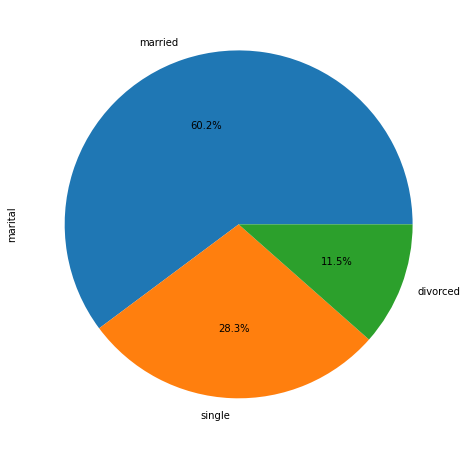

In [102]:
data.marital.value_counts().plot(kind='pie',autopct="%.1f%%")

majority is married which is 60.2% and, divorced and single accounts for 39.8%

### 'education'

education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

In [103]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [104]:
# countplot

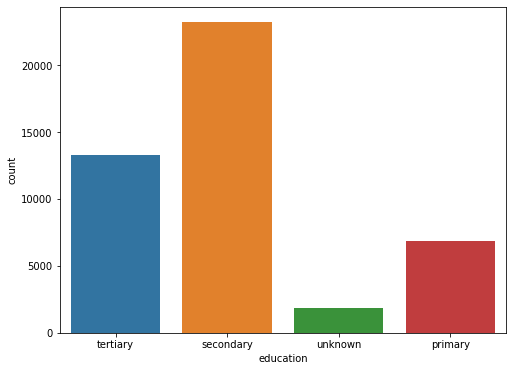

In [105]:
plt.figure(figsize = (8,6))
sns.countplot(data['education'])

In [106]:
# pie chart

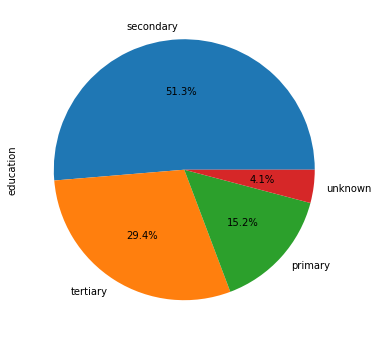

In [107]:
plt.figure(figsize = (8,6))
data.education.value_counts().plot(kind='pie',autopct="%.1f%%")

we need to work on 'unknown' subcategory

### 'contact'

contact communication type (categorical:'cellular','telephone')

In [108]:
data['contact'].value_counts()/len(data)*100

cellular    64.774059
unknown     28.798301
telephone    6.427639
Name: contact, dtype: float64

In [109]:
# countplot

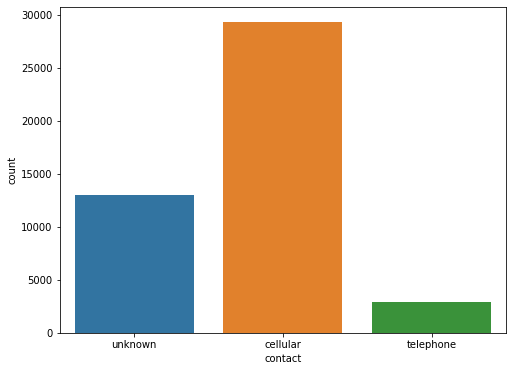

In [110]:
plt.figure(figsize = (8,6))
sns.countplot(data['contact'])

In [111]:
# pie chart

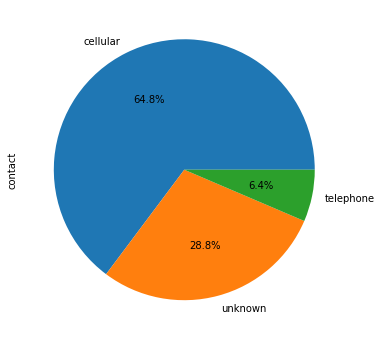

In [112]:
plt.figure(figsize = (8,6))
data.contact.value_counts().plot(kind='pie',autopct="%.1f%%")

maximum client contact is done through cellular mode i,e. 64.8%

## 'month'

last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')

In [113]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [114]:
# countplot

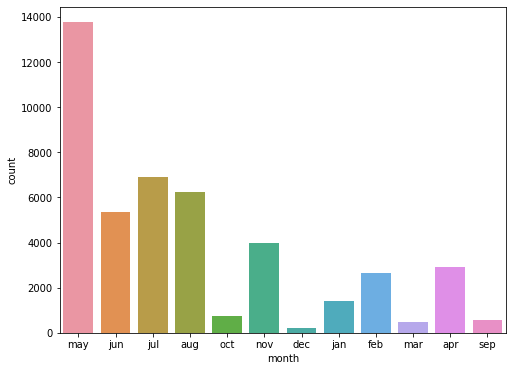

In [115]:
plt.figure(figsize = (8,6))
sns.countplot(data['month'])

In [116]:
# pie chart

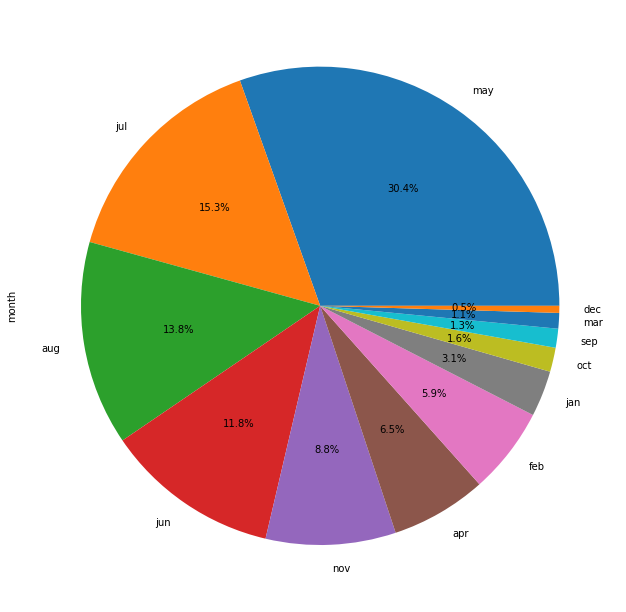

In [117]:
plt.figure(figsize = (13,11))
data.month.value_counts().plot(kind='pie',autopct="%.1f%%")

we can group together months into financial quarters of year

## 'poutcome'

outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')

In [118]:
data['poutcome'].value_counts()/len(data)*100

unknown   81.747805
failure   10.840282
other      4.069806
success    3.342107
Name: poutcome, dtype: float64

In [119]:
# countplot 

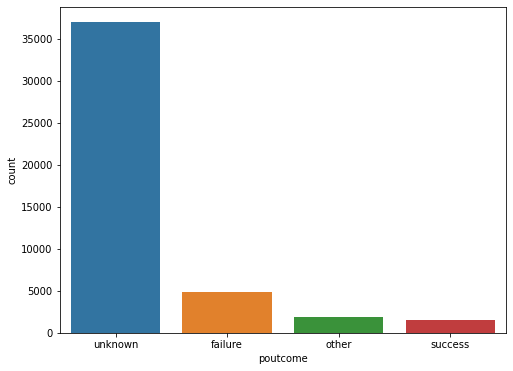

In [120]:
plt.figure(figsize = (8,6))
sns.countplot(data['poutcome'])

In [121]:
# pie chart

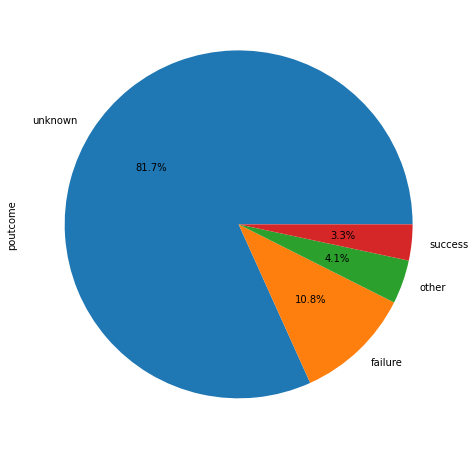

In [122]:
plt.figure(figsize = (8,8))
data.poutcome.value_counts().plot(kind='pie',autopct="%.1f%%")

'unknown' sub-category accounts for 81.7% we need dig deeper in perspective of financial domain. and same with the 'other' sub-category. 

   # Bi-variate analysis 

* AGE - Target

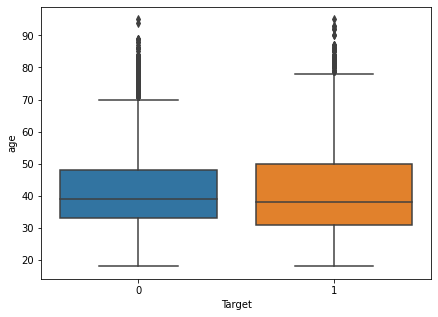

In [123]:
plt.figure(figsize=(7,5))
sns.boxplot(data['Target'],data['age'])

avg age for 'yes' and 'no' is almost same. 

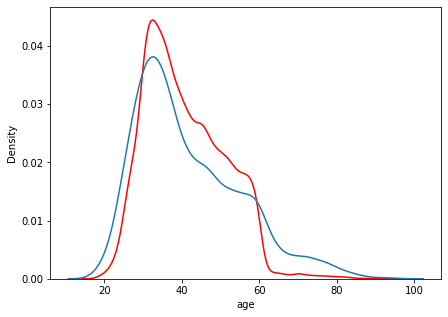

In [124]:
plt.figure(figsize=(7,5))
sns.distplot(data[data['Target']==0]['age'], hist=False, color='red')
sns.distplot(data[data['Target']==1]['age'], hist=False)

* AGE - DURATION

<Figure size 504x360 with 0 Axes>

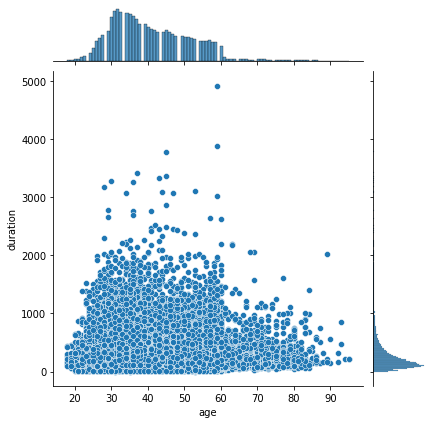

In [125]:
plt.figure(figsize=(7,5))
sns.jointplot(data['age'], data['duration'])

max call duration is between the age group of roughly 28-60 yrs

* AGE - CAMPAIGN

<Figure size 504x360 with 0 Axes>

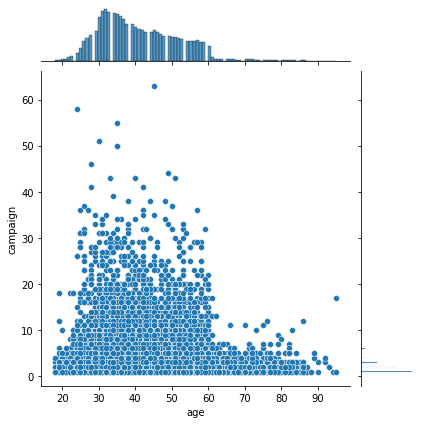

In [126]:
plt.figure(figsize=(7,5))
sns.jointplot(data['age'], data['campaign'])

no. of campaign is also done to around 25 to 60 yrs old segment.

* AGE - BALANCE 

<Figure size 504x360 with 0 Axes>

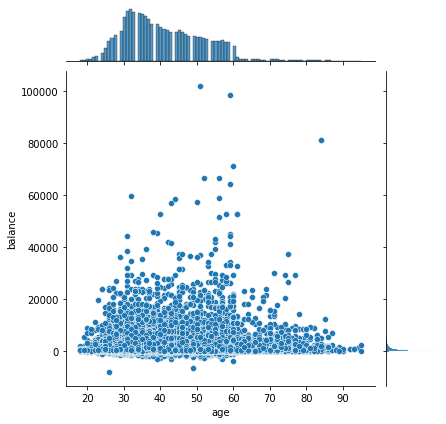

In [127]:
plt.figure(figsize=(7,5))
sns.jointplot(data['age'], data['balance'])

max salary of age group 30 to 60 years

In [128]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0


* BALANCE - LOAN

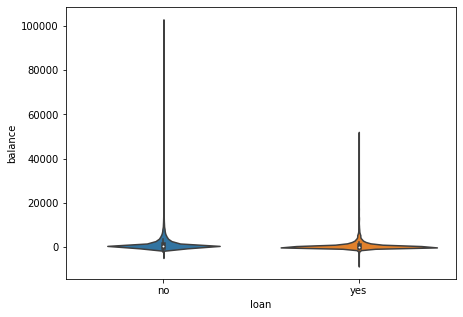

In [129]:
plt.figure(figsize=(7,5))
sns.violinplot(data['loan'],data['balance'])

max people who have high balance have not taken loan

* LOAN - HOUSING

In [130]:
#plt.figure(figsize=(7,5))
#sns.violinplot(data['housing'],data['loan'])

people with good avg income have not taken housing loan.

* BALANCE - DEFAULT

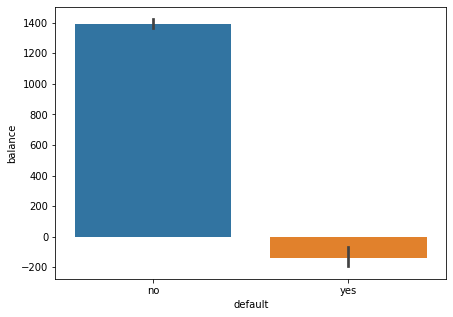

In [131]:
plt.figure(figsize=(7,5))
sns.barplot(data['default'],data['balance'])

here, we can see that people who have balance more than zero have no default credit which is logically correct.

* BALANCE - TARGET

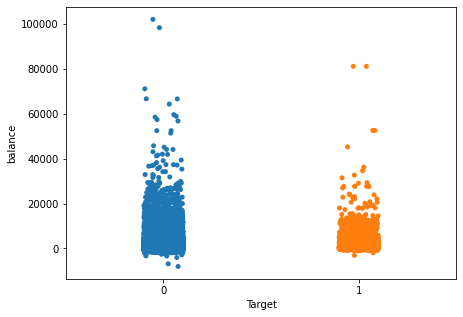

In [132]:
plt.figure(figsize=(7,5))
sns.stripplot(data['Target'],data['balance'])

* JOB-LOAN

In [133]:
pd.crosstab(data['loan'], data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
loan,,,,,,,,,,,,
no,4180,8048,1131,1088,8205,1955,1350,3318,926,6288,1194,284
yes,991,1684,356,152,1253,309,229,836,12,1309,109,4


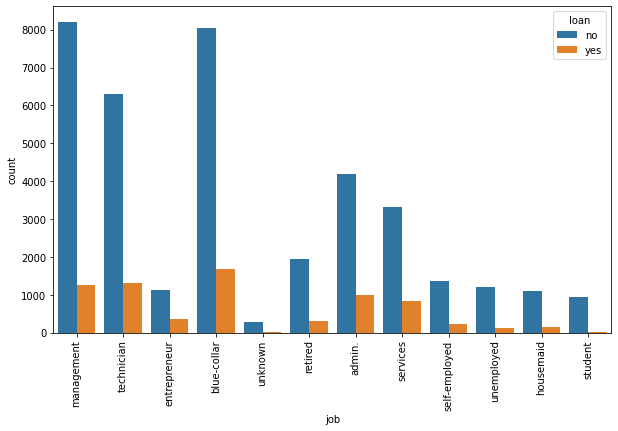

In [134]:
plt.figure(figsize=(10,6))
sns.countplot(data['job'], hue=data['loan'])
plt.xticks(rotation='vertical')
plt.show()

<Figure size 504x288 with 0 Axes>

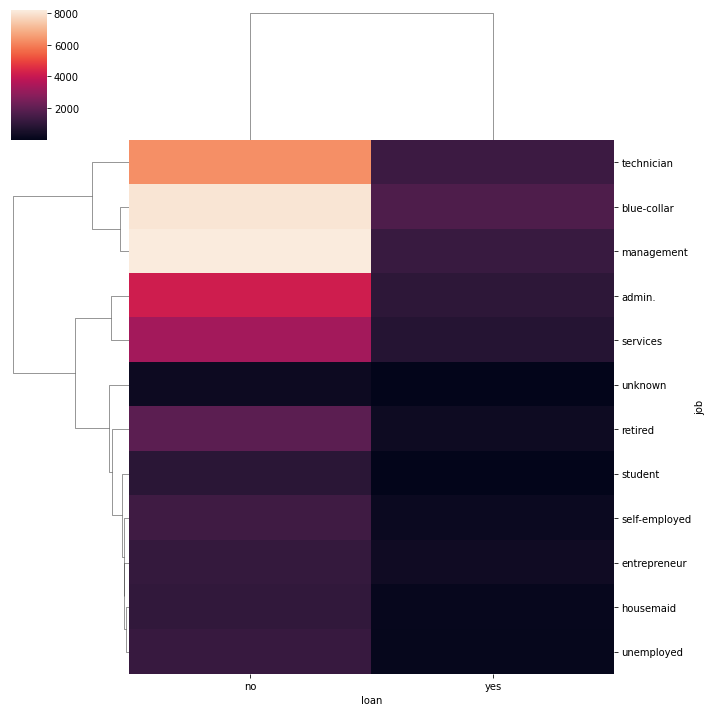

In [135]:
plt.figure(figsize=(7,4))
sns.clustermap(pd.crosstab(data['job'], data['loan']))

**inference** - 

* JOB - HOUSING

In [136]:
pd.crosstab(data['housing'], data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
housing,,,,,,,,,,,,
no,1989,2684,618,842,4780,1773,814,1388,689,3482,760,262
yes,3182,7048,869,398,4678,491,765,2766,249,4115,543,26


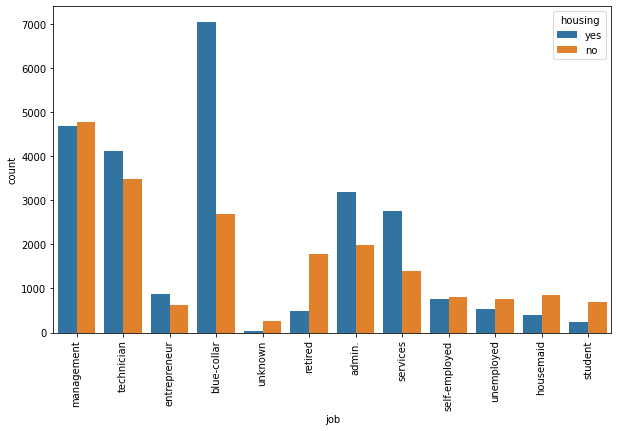

In [137]:
plt.figure(figsize=(10,6))
sns.countplot(data['job'], hue=data['housing'])
plt.xticks(rotation='vertical')
plt.show()

<Figure size 504x288 with 0 Axes>

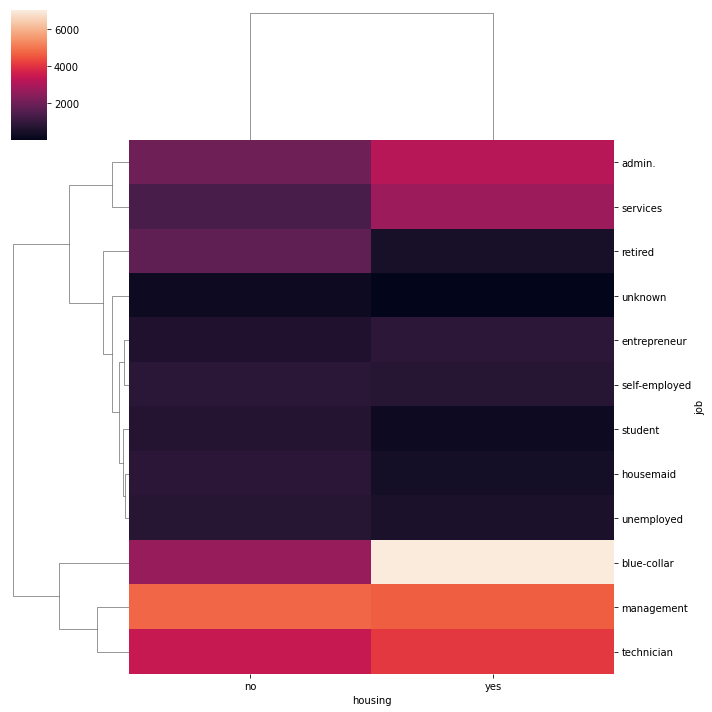

In [138]:
plt.figure(figsize=(7,4))
sns.clustermap(pd.crosstab(data['job'], data['housing']))

**inference** - 

* JOB - DEFAULT

In [139]:
pd.crosstab(data['default'], data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
default,,,,,,,,,,,,
no,5097,9531,1432,1218,9294,2238,1546,4079,935,7467,1273,286
yes,74,201,55,22,164,26,33,75,3,130,30,2


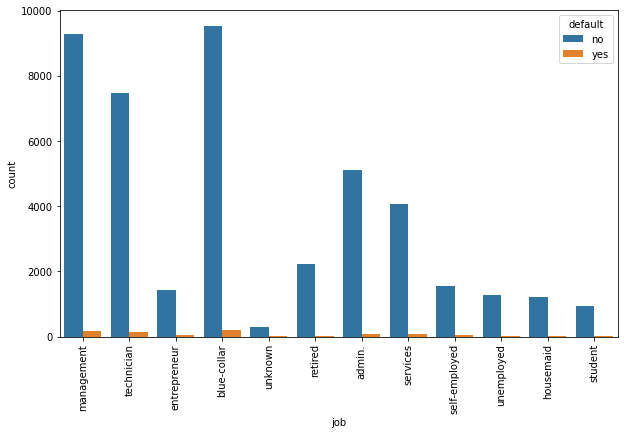

In [140]:
plt.figure(figsize=(10,6))
sns.countplot(data['job'], hue=data['default'])
plt.xticks(rotation='vertical')
plt.show()

<Figure size 504x288 with 0 Axes>

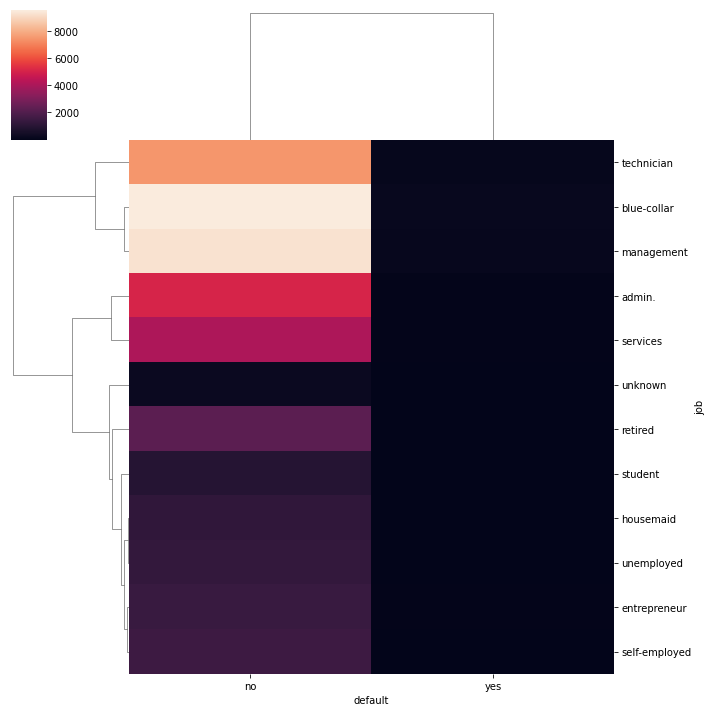

In [141]:
plt.figure(figsize=(7,4))
sns.clustermap(pd.crosstab(data['job'], data['default']))

**inference-**

* JOB - TARGET

In [142]:
pd.crosstab(data['Target'], data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Target,,,,,,,,,,,,
0,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
1,631,708,123,109,1301,516,187,369,269,840,202,34


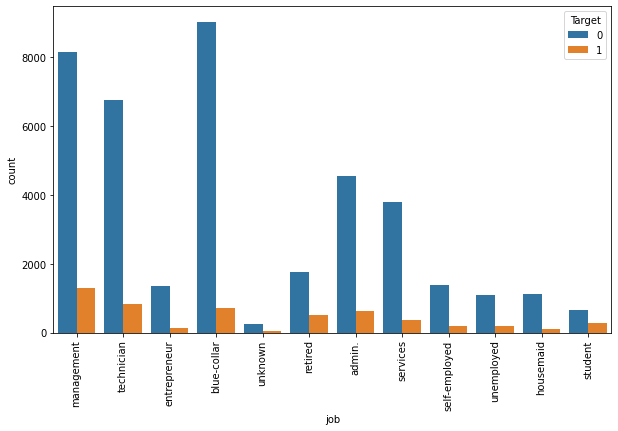

In [143]:
plt.figure(figsize=(10,6))
sns.countplot(data['job'], hue=data['Target'])
plt.xticks(rotation='vertical')
plt.show()

* DURATION - MONTH

In [144]:
data.groupby('month').sum()['duration']

month
apr     874026
aug    1451816
dec      70476
feb     657742
jan     376313
jul    1847690
jun    1298332
mar     116579
may    3591856
nov    1005000
oct     212767
sep     169214
Name: duration, dtype: int64

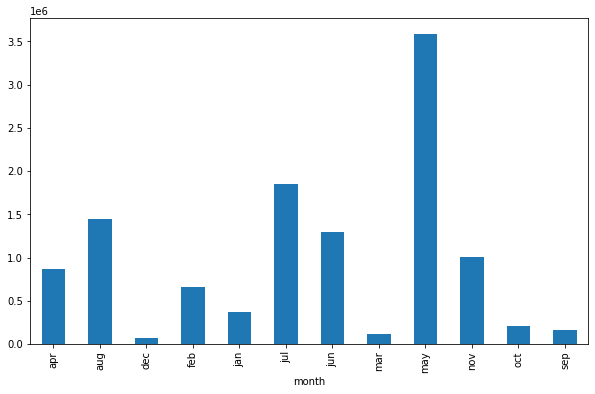

In [145]:
plt.figure(figsize=(10,6))
(data.groupby('month').sum()['duration']).plot(kind='bar')

from above bar plot we can see that max contact has been done in may month which tends to give maximum call duration.

* MONTH - TARGET

In [146]:
data.groupby('month').sum()['Target']  # for target = 1

month
apr    577
aug    688
dec    100
feb    441
jan    142
jul    627
jun    546
mar    248
may    925
nov    403
oct    323
sep    269
Name: Target, dtype: int64

In [147]:
pd.crosstab(data['Target'], data['month'])

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
Target,,,,,,,,,,,,
0,2355,5559,114,2208,1261,6268,4795,229,12841,3567,415,310
1,577,688,100,441,142,627,546,248,925,403,323,269


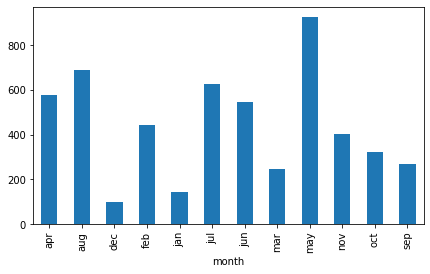

In [148]:
plt.figure(figsize=(7,4))
(data.groupby('month').sum()['Target']).plot(kind='bar')    # for target = 1

in month of maximum client subscribe to Target.

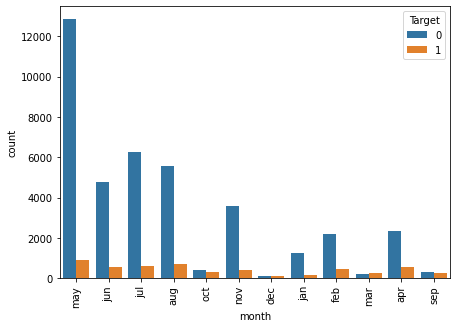

In [149]:
plt.figure(figsize=(7,5))
sns.countplot(data['month'], hue=data['Target'])
plt.xticks(rotation='vertical')
plt.show()

though , in month of may max customer subscribe the 'term deposit' but from above graph we infer that **yes/no** ratio for 'term deposit' is more in **APRIL** month.

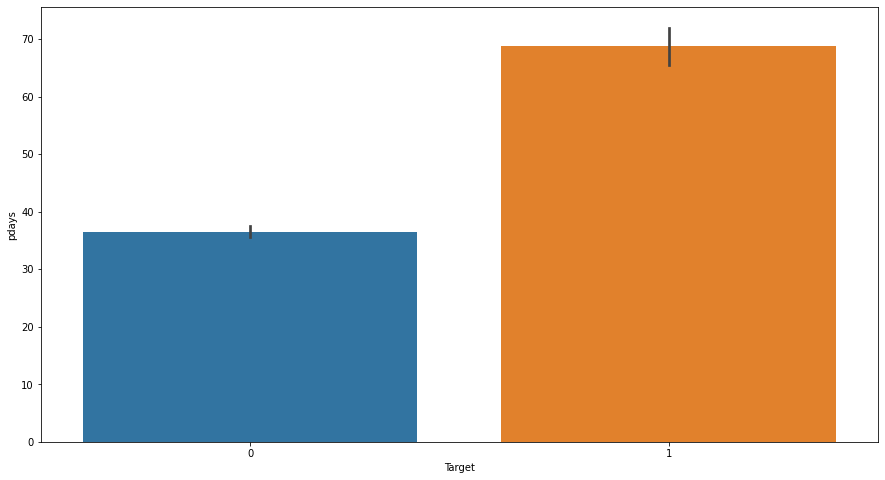

In [150]:
plt.figure(figsize=(15,8))
sns.barplot(data['Target'],data['pdays'] )

* PREVIOUS - POUTCOME

In [151]:
pd.crosstab(data['poutcome'], data['previous'])

previous,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,35,37,38,40,41,51,55,58,275
poutcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
failure,0,1707,1362,660,405,261,146,101,54,49,28,26,22,16,7,9,7,6,1,7,3,1,2,3,1,3,1,2,1,2,2,1,1,0,2,0,0,1,1,0,0
other,0,591,390,238,165,107,64,59,46,27,19,27,17,16,7,10,6,9,5,4,5,2,3,5,4,1,1,3,0,2,1,0,0,2,0,1,1,0,0,1,1
success,0,473,352,244,144,90,67,44,29,16,20,12,5,6,5,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
unknown,36954,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


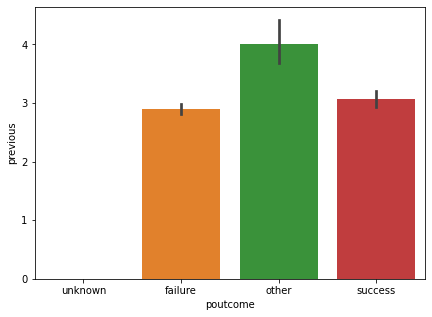

In [152]:
plt.figure(figsize=(7,5))
sns.barplot(data['poutcome'], data['previous'])

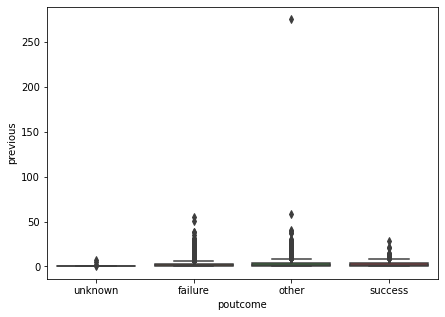

In [153]:
plt.figure(figsize=(7,5))
sns.boxplot(data['poutcome'], data['previous'])

*'other'* and *'unknown'* are kind of anomalies and need to be treated.
* other has one outlier

* Poutcome - TARGET 

In [154]:
pd.crosstab(data['poutcome'], data['Target'])

Target,0,1
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


<Figure size 504x360 with 0 Axes>

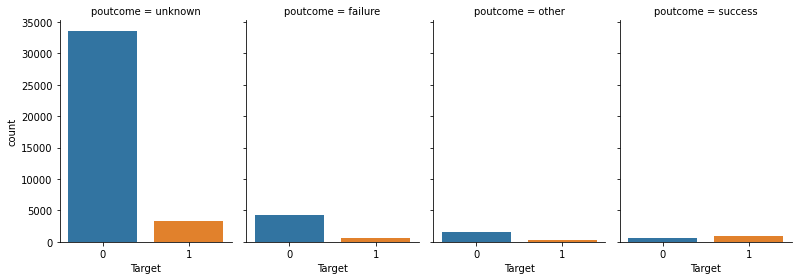

In [155]:
plt.figure(figsize=(7,5))
sns.catplot(x='Target', col='poutcome', data=data, kind='count', height=4, aspect=0.7)

Customer are tend to subscribe more in numbers as compared to previous campaign where previous campaign result was sucess.

* MARITAL - HOUSING

In [156]:
pd.crosstab(data['marital'], data['housing'])

housing,no,yes
marital,,
divorced,2300,2907
married,11893,15321
single,5888,6902


<Figure size 360x216 with 0 Axes>

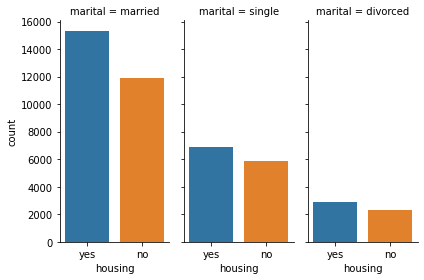

In [157]:
plt.figure(figsize=(5,3))
sns.catplot(x='housing', col='marital', data=data, kind='count', height=4, aspect=0.5)
plt.show()

married customer have more house number which is logically correct.

* CAMPAIGN - TARGET

In [158]:
pd.pivot_table(data, index='Target', values='campaign', aggfunc='mean')

,campaign
Target,
0,2.846350
1,2.141047


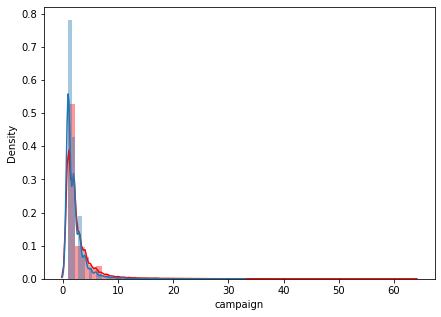

In [159]:
plt.figure(figsize=(7,5))
sns.distplot(data[data['Target']==0]['campaign'], hist=True, color='red')
sns.distplot(data[data['Target']==1]['campaign'], hist=True)

**Inference-**

* JOB - BALANCE

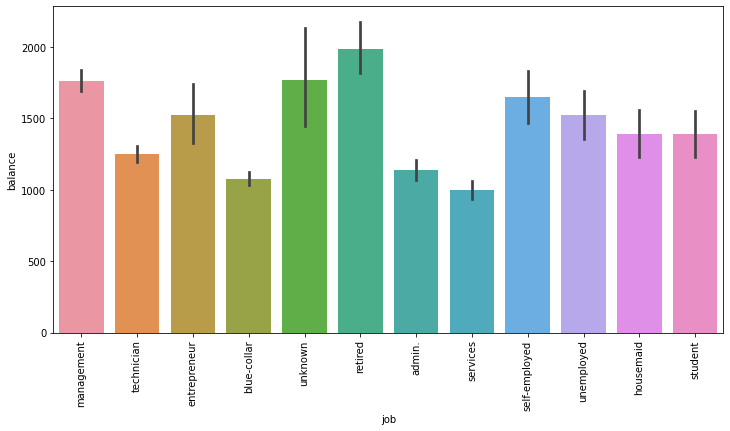

In [160]:
plt.figure(figsize=(12,6))
sns.barplot(data['job'],data['balance'])
plt.xticks(rotation='vertical')
plt.show()

retired has max average balance and services class has min average balance.

# Multi-variate analysis


In [161]:
# distribution of all numerical features

<Figure size 504x288 with 0 Axes>

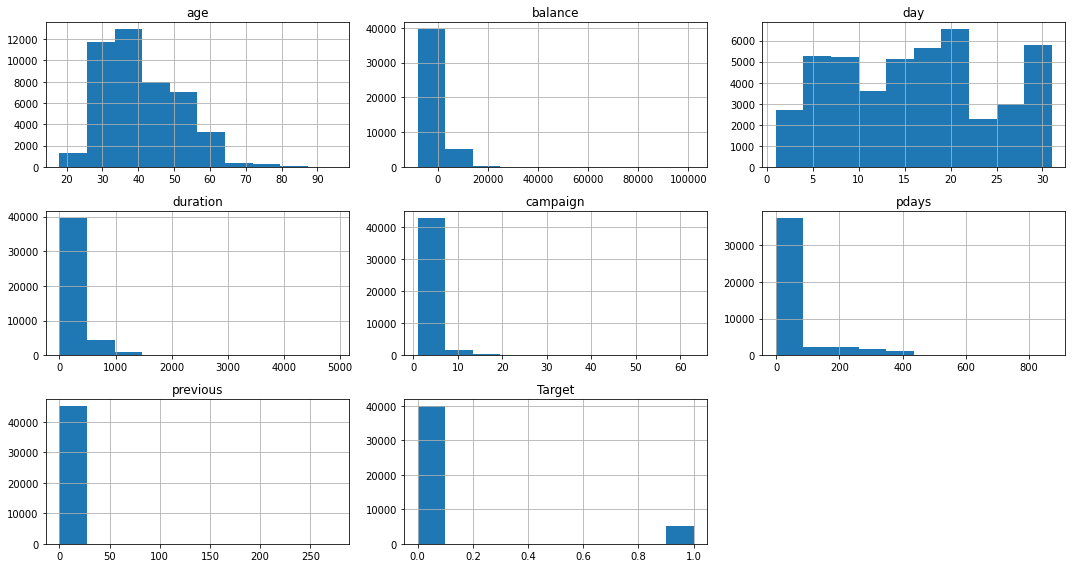

In [162]:
plt.figure(figsize=(7,4))
data.hist()
plt.tight_layout()
plt.show()

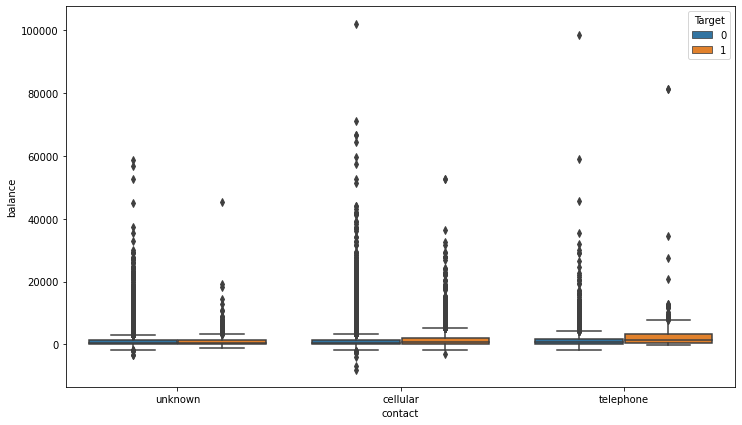

In [163]:
plt.figure(figsize=(12,7))
sns.boxplot(x='contact', y='balance', hue='Target', data=data)

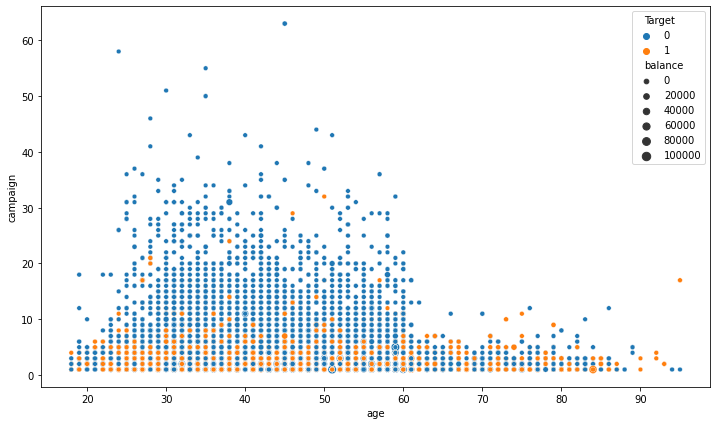

In [164]:
plt.figure(figsize=(12,7))

sns.scatterplot(x='age', y='campaign', hue='Target' ,size='balance', data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

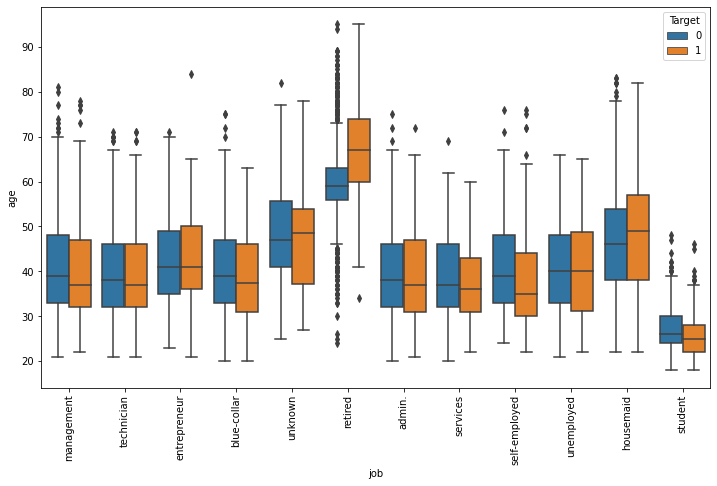

In [165]:
plt.figure(figsize=(12,7))
sns.boxplot(x='job', y='age', hue='Target', data=data)
plt.xticks(rotation='vertical')

In [166]:
# Here we can see that retired people with the age group between 60 to 75 years are more likely to subsrcibe the term deposit.

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

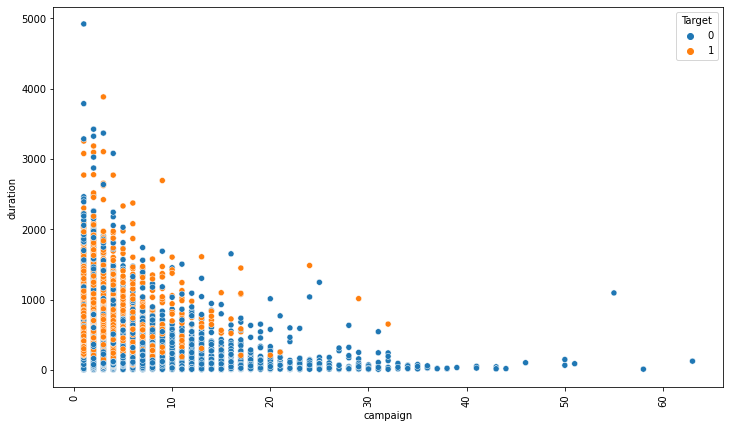

In [167]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='campaign', y='duration', hue='Target', data=data)
plt.xticks(rotation='vertical')

In [168]:
# Here from the plot we can infer that the people will probably subscribe to the term deposit in their first 10-20 contacts. 
# Any more number of contacts shows very less chances of people subscribing the term deposit so its better to contact them for maximum 10-20 times.

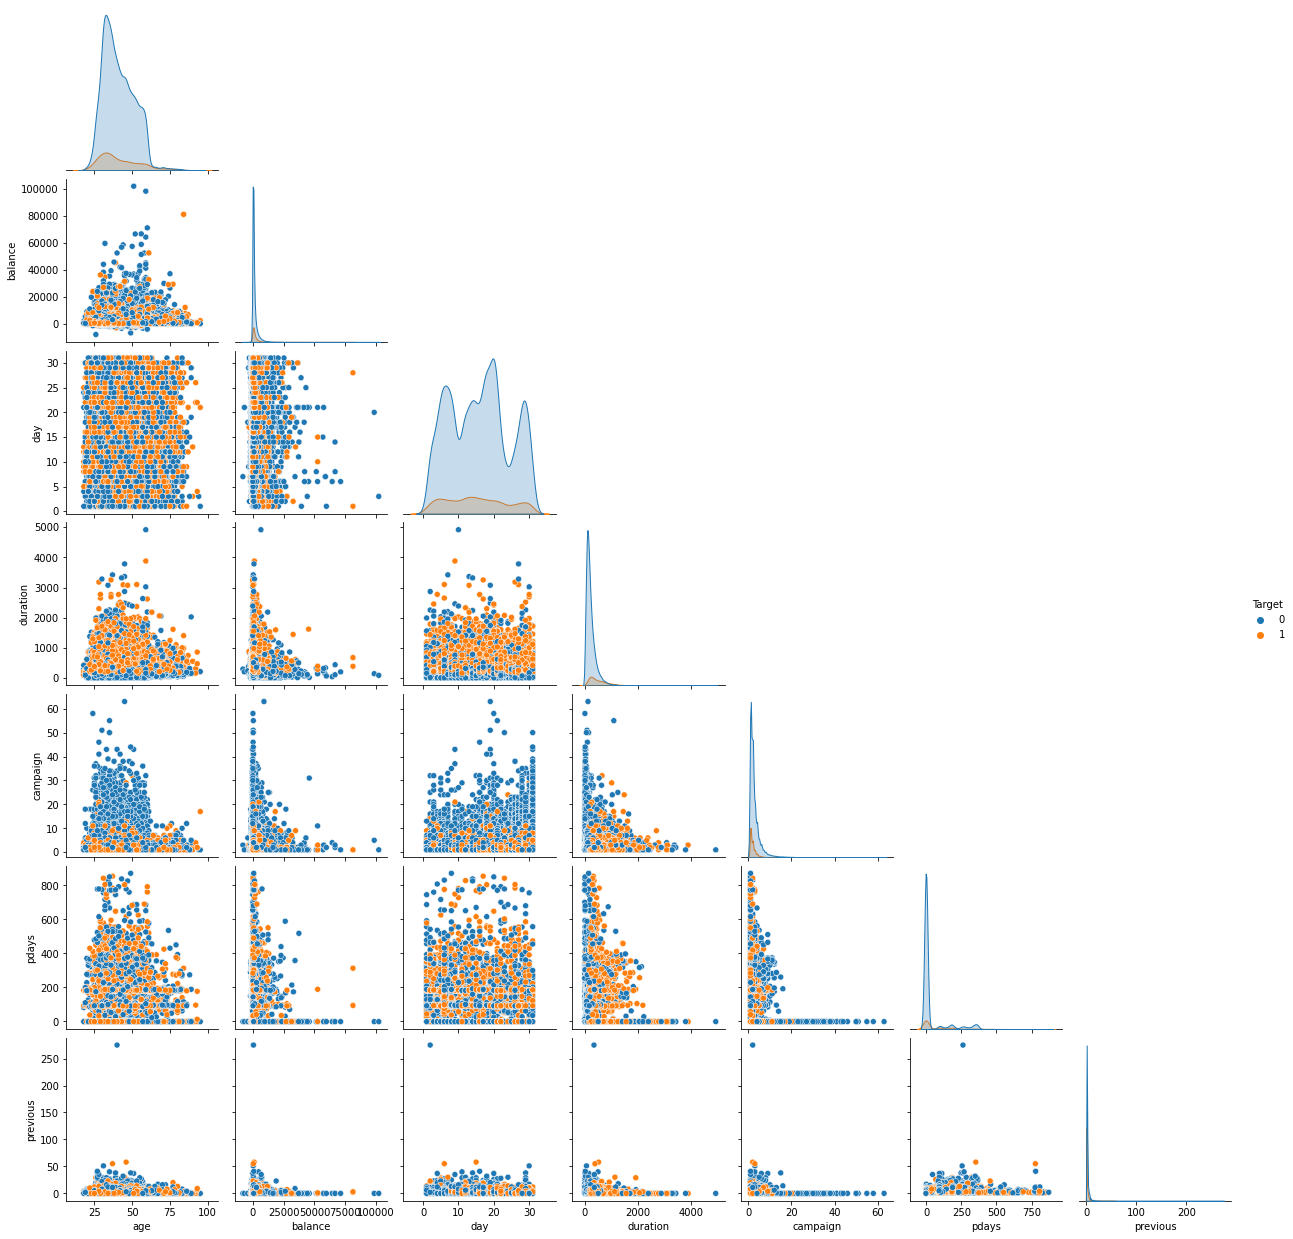

In [169]:
sns.pairplot(data, hue='Target', corner=True)

In [170]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,Target
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Target,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


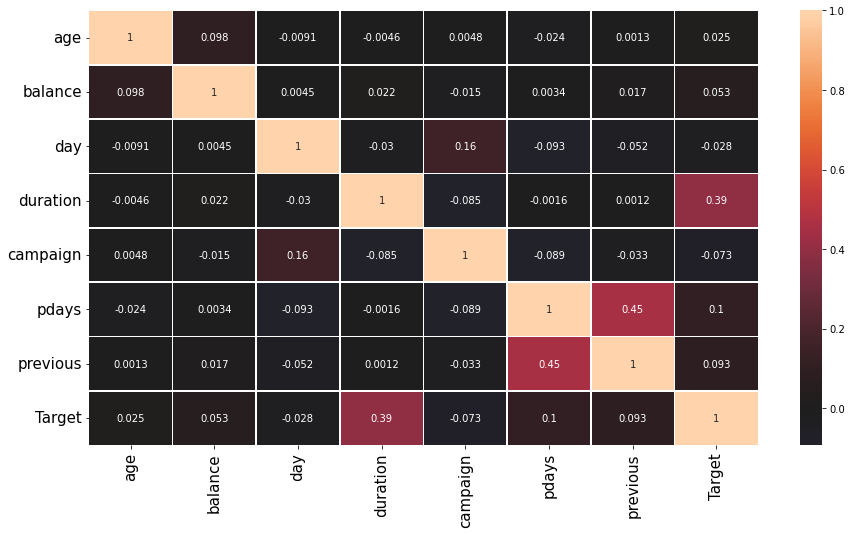

In [171]:
sns.heatmap(data.corr(), annot = True, linewidths=.5, center=0)

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

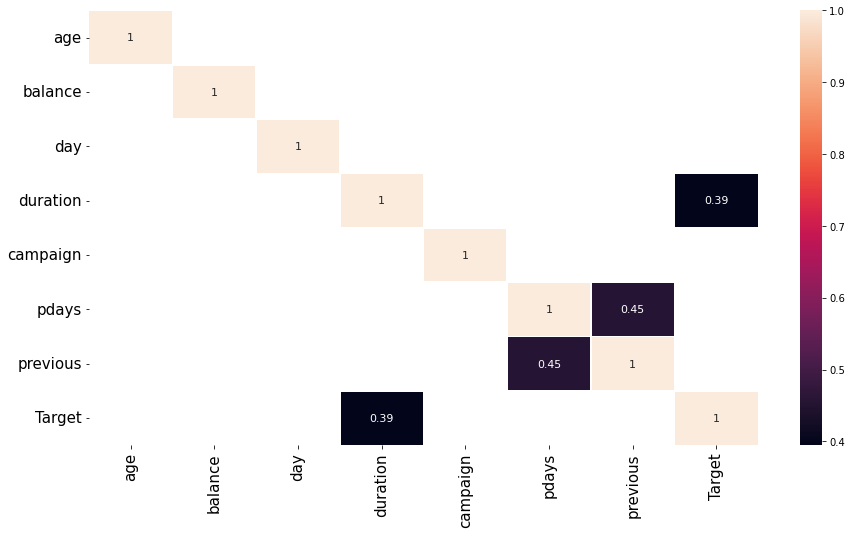

In [172]:

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(data.corr()[np.abs(data.corr()) > 0.25], annot = True,linewidths=0.5, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(rotation = 'vertical',fontsize = 15)

# display the plot
plt.show()

## pdays treatment

In [173]:
data['pdays'].head(5)

0   -1
1   -1
2   -1
3   -1
4   -1
Name: pdays, dtype: int64

In [174]:
data['pdays']=data['pdays']+1

In [175]:
data['pdays'].head(2)

0    0
1    0
Name: pdays, dtype: int64

### Outlier and Outlier Treatment

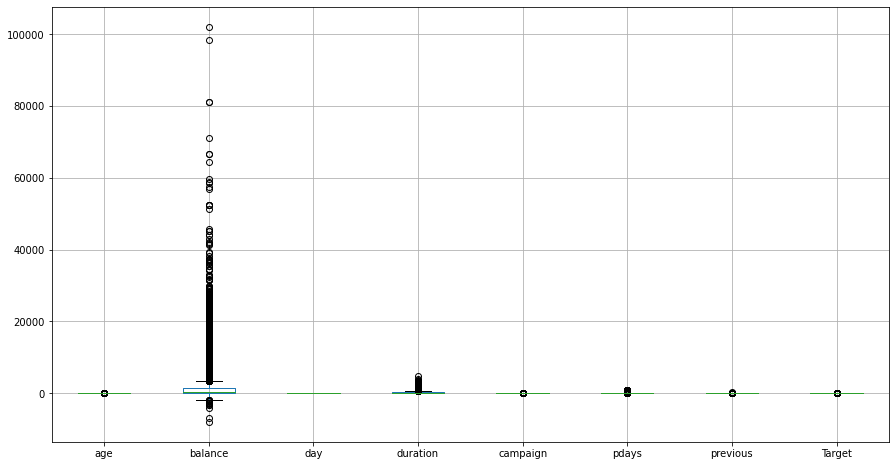

In [176]:
data.boxplot()

we can see there are presence of outliers in a lot of variables


column :  age


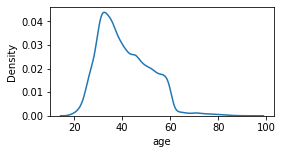

column :  balance


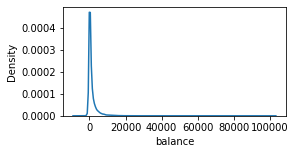

column :  day


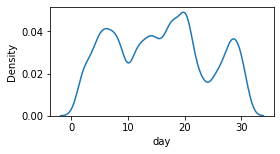

column :  duration


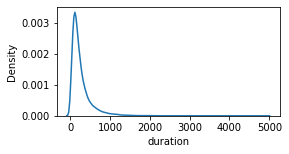

column :  campaign


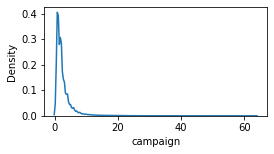

column :  pdays


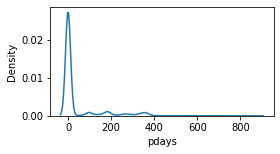

column :  previous


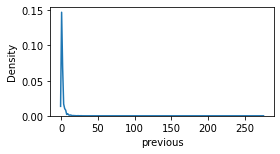

column :  Target


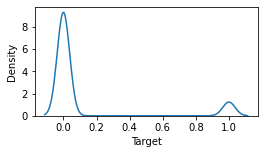

In [177]:
for i in data.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(4,2))
    print('column : ', i)
    sns.distplot(data[i], hist=False)
    plt.show()

In [178]:
data.skew()

age         0.684818
balance     8.360308
day         0.093079
duration    3.144318
campaign    4.898650
pdays       2.615715
previous   41.846454
Target      2.383480
dtype: float64

* to reduce skewness we are using Power Transformation

### power transformation

In [179]:
from sklearn.preprocessing import PowerTransformer
PT_yj = PowerTransformer(method='yeo-johnson')

In [180]:
data[['age','balance','day','duration','campaign','pdays','previous']]=PT_yj.fit_transform(data[['age','balance','day','duration','campaign','pdays','previous']])

In [181]:
data.skew()  


age         0.008605
balance     1.098582
day        -0.157853
duration    0.018045
campaign    0.230942
pdays       1.645208
previous    1.646051
Target      2.383480
dtype: float64

column :  age


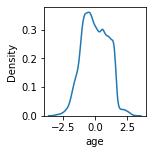

column :  balance


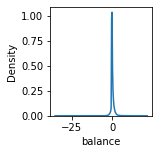

column :  day


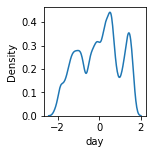

column :  duration


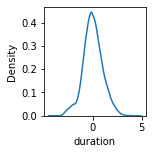

column :  campaign


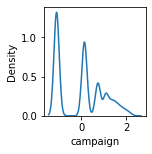

column :  pdays


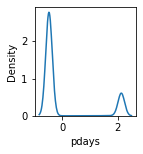

column :  previous


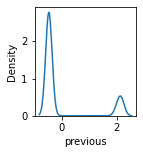

column :  Target


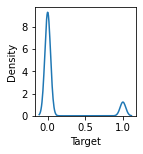

In [182]:
for i in data.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(4,2))
    plt.subplot(1, 2, 1)
    print('column : ', i)
    sns.distplot(data[i], hist=False)
    plt.show()


In [183]:
# now we can see that the skewness is reduce after power transformation

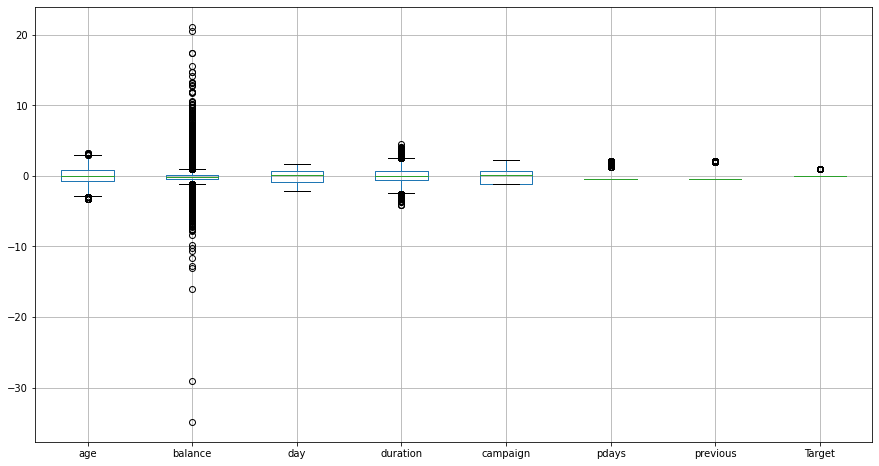

In [184]:
data.boxplot()

## Statistics

In [185]:
!pip install scikit_posthocs

     |████████████████████████████████| 43 kB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=71f33ad9cf73e7646946cce3bb5f05649ab2214f2e5a57a4102626d4bfed871d
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


In [186]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc
from scipy.stats import mannwhitneyu

# import function to perform post-hoc
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
# install scikit_posthocs using "!pip install scikit_posthocs" 
from scipy.stats import levene

In [187]:
# 1. Target  vs age                2 sample t_test_independent  or annova/  mamwhitney u

# 2. Target  vs job                chi-square

# 3. Target  vs marital            chi-square

# 4. Target  vs education          chi-square

# 5. Target  vs default            chi-square

# 6. Target  vs balance            2 sample t_test_independent  or annova/  mamwhitney u

# 7. Target  vs housing            chi-square

# 8. Target  vs loan               chi-square 

# 9. Target  vs day                2 sample t_test_independent  or annova/  mamwhitney u

# 10. Target  vs month             chi-square 

# 11. Target  vs duration          2 sample t_test_independent  or annova/  mamwhitney u

# 12. Target  vs campaign          2 sample t_test_independent  or annova/  mamwhitney u

# 13. Target  vs pdays             2 sample t_test_independent  or annova/  mamwhitney u

# 14. Target  vs previous          2 sample t_test_independent  or annova/  mamwhitney u

**Chi-Square test for independence**

1. BETWEEN JOB and Target

In [188]:
pd.crosstab(data['job'], data['Target'])

Target,0,1
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [189]:
test_stat1,p1,dof1,arr=stats.chi2_contingency(pd.crosstab(data['job'], data['Target']))
print('Test_Statistics : ',test_stat1)

Test_Statistics :  836.1054877471965


In [190]:
print('p_value : ',p1)

p_value :  3.337121944935502e-172


according to the decision rule, If p_value <=0.05(l.o.s) then we reject Null Hypothesis.
So, we reject null hypothesis and can conclude Job and Target are dependent.

2. MARITAL and TARGET

In [191]:
pd.crosstab(data['marital'], data['Target'])

Target,0,1
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [192]:
test_stat2,p2,dof2,expected_val=stats.chi2_contingency(pd.crosstab(data['marital'], data['Target']))
print('Test_Statistics : ',test_stat2)
print('p_value : ',p2)

Test_Statistics :  196.49594565603957
p_value :  2.1450999986791792e-43


according to the decision rule, If p_value <=0.05(l.o.s) then we reject Null Hypothesis.
So, we reject null hypothesis and can conclude Marital and Target are dependent.

3. EDUCATION and TARGET

In [193]:
pd.crosstab(data['education'], data['Target'])

Target,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


In [194]:
test_stat3,p3,dof3,expected_val=stats.chi2_contingency(pd.crosstab(data['education'], data['Target']))
print('Test_Statistics : ',test_stat3)
print('p_value : ',p3)

Test_Statistics :  238.92350616407606
p_value :  1.6266562124072994e-51


according to the decision rule, If p_value <=0.05(l.o.s) then we reject Null Hypothesis.
So, we reject null hypothesis and can conclude Education and Target are dependent.

4. CONTACT and TARGET

In [195]:
pd.crosstab(data['contact'], data['Target'])

Target,0,1
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


In [196]:
test_stat4,p4,dof4,expected_val=stats.chi2_contingency(pd.crosstab(data['contact'], data['Target']))
print('Test_Statistics : ',test_stat4)
print('p_value : ',p4)

Test_Statistics :  1035.714225356292
p_value :  1.251738325340638e-225


according to the decision rule, If p_value <=0.05(l.o.s) then we reject Null Hypothesis.
So, we reject null hypothesis and can conclude Contact and Target are dependent.

5. MONTH and TARGET

In [197]:
pd.crosstab(data['month'], data['Target'])

Target,0,1
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


In [198]:
test_stat5,p5,dof5,expected_val=stats.chi2_contingency(pd.crosstab(data['month'], data['Target']))
print('Test_Statistics : ',test_stat5)
print('p_value : ',p5)

Test_Statistics :  3061.838938445269
p_value :  0.0


according to the decision rule, If p_value <=0.05(l.o.s) then we reject Null Hypothesis.
So, we reject null hypothesis and can conclude Month and Target are dependent.

6. POUTCOME and TARGET

In [199]:
pd.crosstab(data['poutcome'], data['Target'])

Target,0,1
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


In [200]:
test_stat6,p6,dof6,expected_val=stats.chi2_contingency(pd.crosstab(data['poutcome'], data['Target']))
print('Test_Statistics : ',test_stat6)
print('p_value : ',p6)

Test_Statistics :  4391.5065887686615
p_value :  0.0


according to the decision rule, If p_value <=0.05(l.o.s) then we reject Null Hypothesis.
So, we reject null hypothesis and can conclude Poutcome and Target are dependent.

7. DEFAULT and TARGET

In [201]:
pd.crosstab(data['default'], data['Target'])

Target,0,1
default,,
no,39159,5237
yes,763,52


In [202]:
test_stat7,p7,dof7,expected_val=stats.chi2_contingency(pd.crosstab(data['default'], data['Target']))
print('Test_Statistics : ',test_stat7)
print('p_value : ',p7)

Test_Statistics :  22.20224995571685
p_value :  2.4538606753508344e-06


according to the decision rule, If p_value <=0.05(l.o.s) then we reject Null Hypothesis.
So, we reject null hypothesis and can conclude Default and Target are dependent.

8. LOAN and TARGET

In [203]:
pd.crosstab(data['loan'], data['Target'])

Target,0,1
loan,,
no,33162,4805
yes,6760,484


In [204]:
test_stat8,p8,dof8,expected_val=stats.chi2_contingency(pd.crosstab(data['loan'], data['Target']))
print('Test_Statistics : ',test_stat8)
print('p_value : ',p8)

Test_Statistics :  209.61698034978633
p_value :  1.665061163492756e-47


according to the decision rule, If p_value <=0.05(l.o.s) then we reject Null Hypothesis.
So, we reject null hypothesis and can conclude loan and Target are dependent.

9. HOUSING and TARGET

In [205]:
pd.crosstab(data['housing'], data['Target'])

Target,0,1
housing,,
no,16727,3354
yes,23195,1935


In [206]:
test_stat9,p9,dof9,expected_val=stats.chi2_contingency(pd.crosstab(data['housing'], data['Target']))
print('Test_Statistics : ',test_stat9)
print('p_value : ',p9)

Test_Statistics :  874.822448867983
p_value :  2.918797605076633e-192


according to the decision rule, If p_value <=0.05(l.o.s) then we reject Null Hypothesis.
So, we reject null hypothesis and can conclude Housing and Target are dependent.

In [207]:
chi_chart = pd.DataFrame({'variable_1':['job','marital','education','contact','month','poutcome','default','loan','housing'],
                          'variable_2':['Target','Target','Target','Target','Target','Target','Target','Target','Target',],
                          'p_value':[p1,p2,p3,p4,p5,p6,p7,p8,p9],
                         'DOF':[dof1,dof2,dof3,dof4,dof5,dof6,dof7,dof8,dof9],
                         'Test_Statistics':[test_stat1,test_stat2,test_stat3,test_stat4,test_stat5,test_stat6,test_stat7,test_stat8,test_stat9]})

In [208]:
chi_chart

,variable_1,variable_2,p_value,DOF,Test_Statistics
0,job,Target,0.000000,11,836.105488
1,marital,Target,0.000000,2,196.495946
2,education,Target,0.000000,3,238.923506
3,contact,Target,0.000000,2,1035.714225
4,month,Target,0.000000,11,3061.838938
5,poutcome,Target,0.000000,3,4391.506589
6,default,Target,0.000002,1,22.202250
7,loan,Target,0.000000,1,209.616980
8,housing,Target,0.000000,1,874.822449


## Normality Test and other statistical test after power transformation

In [209]:
# 1. Target  vs age                2 sample t_test_independent  or annova/  mamwhitneyu

print(stats.shapiro(data['age']))

Target_no=data[data['Target']==0]['age']
Target_yes=data[data['Target']==1]['age']

print(stats.shapiro(Target_no))
print(stats.shapiro(Target_yes))

# Null : data is not normal 
# Altr : data is not normal

print(stats.levene(Target_no,Target_yes,data['age']))

# Null : data is Equal
# Altr : data is not Equal

# we can see that p_value is less than 0.05  we reject the null hypothesis  we apply non parametric tests

(0.9903243184089661, 1.401298464324817e-45)
(0.9878336191177368, 0.0)
(0.9878864288330078, 6.544713591037076e-21)
LeveneResult(statistic=309.18196287926907, pvalue=1.5172081010815015e-134)


In [210]:
# we are applying mannwhitney u test

# Null : Target and age are independent
# Altr : Target and age are dependent

stats.mannwhitneyu(Target_no,Target_yes)

# we can see that p_value is less than 0.05  we reject the null hypothesis  

# Tagret and age are dependent

MannwhitneyuResult(statistic=103915109.5, pvalue=0.031408955093487935)

In [211]:
# . Target  vs balance            2 sample t_test_independent  or annova/  mamwhitney u

print(stats.shapiro(data['balance']))

Target_bal_no=data[data['Target']==0]['balance']
Target_bal_yes=data[data['Target']==1]['balance']

print(stats.shapiro(Target_bal_no))
print(stats.shapiro(Target_bal_yes))

# Null : data is not normal 
# Altr : data is not normal

print(stats.levene(Target_bal_no,Target_bal_yes,data['balance']))

# Null : data is Equal
# Altr : data is not Equal

# we can see that p_value is less than 0.05  we reject the null hypothesis  we apply non parametric tests

(0.6598735451698303, 0.0)
(0.6569222807884216, 0.0)
(0.6644949913024902, 0.0)
LeveneResult(statistic=8.746256487432523, pvalue=0.0001591902438733511)


In [212]:
# we are applying mannwhitney u test

# Null : Target and balance are independent
# Altr : Target and balance are dependent

stats.mannwhitneyu(Target_bal_no,Target_bal_yes)

# we can see that p_value is less than 0.05  we reject the null hypothesis  

# Tagret and balance are dependent

MannwhitneyuResult(statistic=86557474.5, pvalue=3.296922904344571e-101)

In [213]:
# . Target  vs day                2 sample t_test_independent  or annova/  mamwhitney u

print(stats.shapiro(data['day']))

Target_day_no=data[data['Target']==0]['day']
Target_day_yes=data[data['Target']==1]['day']

print(stats.shapiro(Target_day_no))
print(stats.shapiro(Target_day_yes))

# Null : data is not normal 
# Altr : data is not normal

print(stats.levene(Target_day_no,Target_day_yes,data['day']))

# Null : data is Equal
# Altr : data is not Equal

# we can see that p_value is less than 0.05  we reject the null hypothesis  we apply non parametric t

(0.9629681706428528, 0.0)
(0.9625270962715149, 0.0)
(0.9645955562591553, 3.8221910542081903e-34)
LeveneResult(statistic=7.3049157183108635, pvalue=0.0006726229616135857)


In [214]:
# we are applying mannwhitney u test

# Null : Target and day are independent
# Altr : Target and day are dependent

stats.mannwhitneyu(Target_day_no,Target_day_yes)

# we can see that p_value is less than 0.05  we reject the null hypothesis  

# Tagret and day are dependent

MannwhitneyuResult(statistic=99974112.0, pvalue=1.6630393167944684e-10)

In [215]:
#. Target  vs duration          2 sample t_test_independent  or annova/  mamwhitney u

print(stats.shapiro(data['duration']))

Target_dur_no=data[data['Target']==0]['duration']
Target_dur_yes=data[data['Target']==1]['duration']

print(stats.shapiro(Target_dur_no))
print(stats.shapiro(Target_dur_yes))

# Null : data is not normal 
# Altr : data is not normal

print(stats.levene(Target_dur_no,Target_dur_yes,data['duration']))

# Null : data is Equal
# Altr : data is not Equal

# we can see that p_value is less than 0.05  we reject the null hypothesis  we apply non parametric t

(0.9957128763198853, 6.41495552576539e-33)
(0.9946985840797424, 1.789465381750086e-34)
(0.9931455850601196, 2.841595002987915e-15)
LeveneResult(statistic=73.09395059912087, pvalue=1.9113260971890662e-32)


In [216]:
# we are applying mannwhitney u test

# Null : Target and duration are independent
# Altr : Target and duration are dependent

stats.mannwhitneyu(Target_dur_no,Target_dur_yes)

# we can see that p_value is less than 0.05  we reject the null hypothesis  

# Tagret and duration are dependent

MannwhitneyuResult(statistic=40625701.0, pvalue=0.0)

In [217]:
#. Target  vs campaign          2 sample t_test_independent  or annova/  mamwhitney u

print(stats.shapiro(data['campaign']))

Target_cam_no=data[data['Target']==0]['campaign']
Target_cam_yes=data[data['Target']==1]['campaign']

print(stats.shapiro(Target_cam_no))
print(stats.shapiro(Target_cam_yes))

# Null : data is not normal 
# Altr : data is not normal

print(stats.levene(Target_cam_no,Target_cam_yes,data['campaign']))

# Null : data is Equal
# Altr : data is not Equal

# we can see that p_value is less than 0.05  we reject the null hypothesis  we apply non parametric t

(0.8572559952735901, 0.0)
(0.8625689744949341, 0.0)
(0.8085665106773376, 0.0)
LeveneResult(statistic=0.17593100267169362, pvalue=0.8386761348367627)


In [218]:
# we are applying mannwhitney u test

# Null : Target and campaign are independent
# Altr : Target and campaign are dependent

stats.mannwhitneyu(Target_cam_no,Target_cam_yes)

# we can see that p_value is less than 0.05  we reject the null hypothesis  

# Tagret and campaign are dependent

MannwhitneyuResult(statistic=90300543.5, pvalue=9.742452436952279e-72)

In [219]:
# 13. Target  vs pdays             2 sample t_test_independent  or annova/  mamwhitney u

print(stats.shapiro(data['pdays']))

Target_pday_no=data[data['Target']==0]['pdays']
Target_pday_yes=data[data['Target']==1]['pdays']

print(stats.shapiro(Target_pday_no))
print(stats.shapiro(Target_pday_yes))

# Null : data is not normal 
# Altr : data is not normal

print(stats.levene(Target_day_no,Target_day_yes,data['pdays']))

# Null : data is Equal
# Altr : data is not Equal

# we can see that p_value is less than 0.05  we reject the null hypothesis  we apply non parametric t

(0.4710971713066101, 0.0)
(0.44043081998825073, 0.0)
(0.6105779409408569, 0.0)
LeveneResult(statistic=2363.664756433444, pvalue=0.0)


In [220]:
# we are applying mannwhitney u test

# Null : Target and pdays are independent
# Altr : Target and pdays are dependent

stats.mannwhitneyu(Target_pday_no,Target_pday_yes)

# we can see that p_value is less than 0.05  we reject the null hypothesis  

# Tagret and pdays are dependent

MannwhitneyuResult(statistic=85889711.5, pvalue=1.2420588251888467e-235)

In [221]:
#. Target  vs previous          2 sample t_test_independent  or annova/  mamwhitney u

print(stats.shapiro(data['previous']))

Target_prev_no=data[data['Target']==0]['previous']
Target_prev_yes=data[data['Target']==1]['previous']

print(stats.shapiro(Target_prev_no))
print(stats.shapiro(Target_prev_yes))

# Null : data is not normal 
# Altr : data is not normal

print(stats.levene(Target_prev_yes,Target_prev_no,data['previous']))

# Null : data is Equal
# Altr : data is not Equal

# we can see that p_value is less than 0.05  we reject the null hypothesis  we apply non parametric t

(0.474953293800354, 0.0)
(0.44383537769317627, 0.0)
(0.618766188621521, 0.0)
LeveneResult(statistic=645.8093183948391, pvalue=3.257936172608396e-279)


In [222]:
# we are applying mannwhitney u test

# Null : Target and previous are independent
# Altr : Target and previous are dependent

stats.mannwhitneyu(Target_prev_yes,Target_prev_no)

# we can see that p_value is less than 0.05  we reject the null hypothesis  

# Tagret and previous are dependent

MannwhitneyuResult(statistic=83972625.0, pvalue=1.745912130207496e-283)

## Feature Engineering

## month variable

As we know it is a dataset of Portugal bank data whee financial month start from January to December.

So, we can divide the months into 4 Quarter. 
- Jan - March = Q1
- April - June = Q2
- July - Sept = Q3
- Oct -Dec = Q4

In [223]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [224]:
data['month']=data['month'].replace(['jan','feb','mar'],'Q1')
data['month']=data['month'].replace(['apr','may','jun'],'Q2')
data['month']=data['month'].replace(['jul','aug','sep'],'Q3')
data['month']=data['month'].replace(['oct','nov','dec'],'Q4')

In [225]:
data['month'].unique()

array(['Q2', 'Q3', 'Q4', 'Q1'], dtype=object)

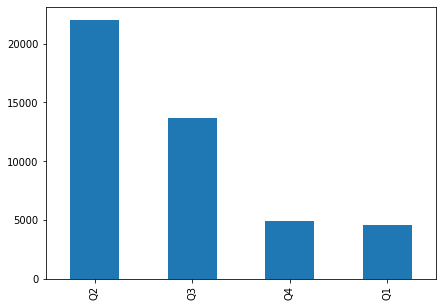

In [226]:
plt.figure(figsize=(7,5))
data['month'].value_counts().plot(kind='bar')

## JOB variable

In [227]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [228]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [229]:
data['job']=data['job'].replace(['management','admin.'],'White-Collar')
data['job']=data['job'].replace(['blue-collar','technician','services','housemaid'],'Blue-Collar')
data['job']=data['job'].replace(['self-employed','entrepreneur','unknown'],'Self-Emp')
data['job']=data['job'].replace(['unemployed','student','retired'],'Unemployed')

In [230]:
data['job'].value_counts()

Blue-Collar     22723
White-Collar    14629
Unemployed       4505
Self-Emp         3354
Name: job, dtype: int64

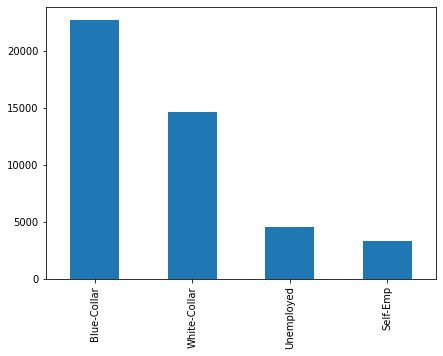

In [231]:
plt.figure(figsize=(7,5))
data['job'].value_counts().plot(kind='bar')

## day

* According to the business knowledge we can conclude that days in not significant though it is dependent with target statistically. So, we can drop it.

In [232]:
data.drop('day',axis=1, inplace=True)

In [233]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,1.473637,White-Collar,married,tertiary,no,0.414773,yes,no,unknown,Q2,0.386077,-1.108191,-0.472527,-0.472500,unknown,0


## Education

In [234]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [235]:
data['education'].replace(to_replace='unknown', value=data['education'].mode()[0], inplace=True)

In [236]:
data.education.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

## pdays treatment

In [237]:
''' data['pdays'].head(5)
data['pdays']=data['pdays']+1     
data['pdays'].head(2) '''
# already treated
data['pdays'].head(2)

0   -0.472527
1   -0.472527
Name: pdays, dtype: float64

# encoding for categorical

In [238]:
data.shape

(45211, 16)

In [239]:
data.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
Target         int64
dtype: object

In [240]:
#data[['default','housing','loan']]=data[['default','housing','loan']].astype('object')

In [241]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,1.473637,White-Collar,married,tertiary,no,0.414773,yes,no,unknown,Q2,0.386077,-1.108191,-0.472527,-0.472500,unknown,0
1,0.429379,Blue-Collar,single,secondary,no,-0.410774,yes,no,unknown,Q2,-0.223033,-1.108191,-0.472527,-0.472500,unknown,0
2,-0.709873,Self-Emp,married,secondary,no,-0.431122,yes,yes,unknown,Q2,-0.923854,-1.108191,-0.472527,-0.472500,unknown,0
3,0.683128,Blue-Collar,married,secondary,no,0.197685,yes,no,unknown,Q2,-0.735678,-1.108191,-0.472527,-0.472500,unknown,0
4,-0.709873,Self-Emp,single,secondary,no,-0.432119,no,no,unknown,Q2,0.072812,-1.108191,-0.472527,-0.472500,unknown,0


In [242]:
df_features = data.iloc[:,:-1]
df_target = data.iloc[:,-1]

In [243]:
df_features.shape

(45211, 15)

In [244]:
df_target.shape

(45211,)

In [245]:
cat_feat = df_features.select_dtypes(include='object')
cat_feat.head(2)

,job,marital,education,default,housing,loan,contact,month,poutcome
0,White-Collar,married,tertiary,no,yes,no,unknown,Q2,unknown
1,Blue-Collar,single,secondary,no,yes,no,unknown,Q2,unknown


In [246]:
dum_var = pd.get_dummies(cat_feat, drop_first=True)

In [247]:
dum_var.head(2)

,job_Self-Emp,job_Unemployed,job_White-Collar,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_Q2,month_Q3,month_Q4,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1
1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1


In [248]:
num_feat = df_features.select_dtypes(include='number')
num_feat.head(2)

,age,balance,duration,campaign,pdays,previous
0,1.473637,0.414773,0.386077,-1.108191,-0.472527,-0.472500
1,0.429379,-0.410774,-0.223033,-1.108191,-0.472527,-0.472500


In [249]:
x = pd.concat([num_feat,dum_var], axis=1)
y = df_target

In [250]:
x.head()

,age,balance,duration,campaign,pdays,previous,job_Self-Emp,job_Unemployed,job_White-Collar,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_Q2,month_Q3,month_Q4,poutcome_other,poutcome_success,poutcome_unknown
0,1.473637,0.414773,0.386077,-1.108191,-0.472527,-0.472500,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1
1,0.429379,-0.410774,-0.223033,-1.108191,-0.472527,-0.472500,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1
2,-0.709873,-0.431122,-0.923854,-1.108191,-0.472527,-0.472500,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1
3,0.683128,0.197685,-0.735678,-1.108191,-0.472527,-0.472500,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1
4,-0.709873,-0.432119,0.072812,-1.108191,-0.472527,-0.472500,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1


In [251]:
x.shape

(45211, 24)

In [252]:
y.shape

(45211,)

# train test split

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=10)

In [255]:
xtrain.shape

(31647, 24)

In [256]:
xtrain.head(2)

,age,balance,duration,campaign,pdays,previous,job_Self-Emp,job_Unemployed,job_White-Collar,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_Q2,month_Q3,month_Q4,poutcome_other,poutcome_success,poutcome_unknown
38436,-1.098930,-0.371531,0.190880,0.134537,2.128241,2.021338,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6566,-0.250469,-0.433205,-2.223222,1.961655,-0.472527,-0.472500,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1


In [257]:
ytrain.shape

(31647,)

In [258]:
ytrain.head(2)

38436    0
6566     0
Name: Target, dtype: int64

In [259]:
xtest.shape

(13564, 24)

In [260]:
ytest.shape

(13564,)

# Base Model
## Logistic Regression

In [261]:
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [262]:
x = sm.add_constant(x)

In [263]:
logreg = sm.Logit(ytrain, xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.239898
         Iterations 8


In [264]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31623
Method:                           MLE   Df Model:                           23
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3386
Time:                        09:51:40   Log-Likelihood:                -7592.0
converged:                       True   LL-Null:                       -11479.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0507      0.024     -2.086      0.037      -0.098      -0.003
balance                 0.0941      0.020      4.677      0.000       0.055       0.134
duration        

Here From OLS, we can infer that 'previous', 'job_self_emp', 'marital_single', 'default_yes', 'contact_telephone', 'month_Q2'and 'month_Q4' are insignificant because its p_value is more than significance level (0.05) But keeping in domain knowledge we cant remove all. like 'job_self_emp', 'marital_single' may be important so, for this we need to dive more deeper to get the final conclusion.

### Interpret the odds for each variable

In [265]:
df_odds=pd.DataFrame(np.exp(logreg.params),columns=['odds'])
df_odds

,odds
age,0.950605
balance,1.098701
duration,4.477004
campaign,0.822486
pdays,0.406040
previous,0.889437
job_Self-Emp,0.857122
job_Unemployed,1.695968
job_White-Collar,1.167498
marital_married,0.783300


**Interpretation:** 
    
odds_duration = 4.478279, it implies that the odds of getting client subscribed a term deposit increases by factor of 4.478279 due to one unit increase in the duration, keeping other variables constant.

odds_age = 0.950194, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.950194 due to one unit increase in the age, keeping other variables constant.

odds_balance = 1.098043, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.098043 due to one unit increase in the age, keeping other variables constant.

odds_campaign = 0.820567, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.820567 due to one unit increase in the campaign, keeping other variables constant.

odds_pdays = 0.846084, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.846084 due to one unit increase in the pdays, keeping other variables constant.

odds_previous = 1.957336, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.957336 due to one unit increase in the previous, keeping other variables constant.

odds_job_Self_Emp = 0.849878, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.849878 due to one unit increase in the job_Self_Emp, keeping other variables constant.

odds_job_Unemployed = 1.691895, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.691895 due to one unit increase in the job_Unemployed, keeping other variables constant.

odds_job_White_Collar = 1.164744, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.164744 due to one unit increase in the job_White_Collar, keeping other variables constant.

odds_martial_married = 0.787397, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.787397 due to one unit increase in the martial_married, keeping other variables constant.

odds_martial_single = 1.045655, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.045655 due to one unit increase in the martial_single, keeping other variables constant.

odds_education_secondary = 1.218215, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.218215 due to one unit increase in the education_secondary, keeping other variables constant.

odds_education_tertiary = 1.473946, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.473946 due to one unit increase in the education_tertiary, keeping other variables constant.

odds_education_unknown = 1.442766, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.442766 due to one unit increase in the education_unknown, keeping other variables constant.

odds_default_1 = 0.881121, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.881121 due to one unit increase in the default_1, keeping other variables constant.

odds_housing_1 = 0.417456, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.417456 due to one unit increase in the housing_1, keeping other variables constant.

odds_loan_1 = 0.608677, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.608677 due to one unit increase in the loan_1, keeping other variables constant.

odds_contact_telephone = 0.968099, it implies that the odds of getting client subscribed a term deposit increases by  
                factor of 0.968099 due to one unit increase in the contact_telephone, keeping other variables constant.

odds_contact_unknown = 0.275200, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.275200 due to one unit increase in the contact_unknown, keeping other variables constant.

odds_month_Q2 = 1.060005, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.060005 due to one unit increase in the month_Q2, keeping other variables constant.

odds_month_Q3 = 0.707848, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.707848 due to one unit increase in the month_Q3, keeping other variables constant.

odds_month_Q4 = 0.965800, it implies that the odds of getting client subscribed a term deposit increases by factor of 0.965800 due to one unit increase in the month_Q4, keeping other variables constant.

odds_poutcome_other = 1.324336, it implies that the odds of getting client subscribed a term deposit increases by factor of 1.324336 due to one unit increase in the poutcome_other, keeping other variables constant.

odds_poutcome_success = 10.672878, it implies that the odds of getting client subscribed a term deposit increases by factor of 10.672878 due to one unit increase in the poutcome_success, keeping other variables constant.

odds_poutcome_unknown = 2.960311, it implies that the odds of getting client subscribed a term deposit increases by factor of 2.960311 due to one unit increase in the poutcome_unknown, keeping other variables constant.

In [266]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
ypred_lr = model.predict(xtest)

In [267]:
print('Train Accuracy :',  accuracy_score(ytrain, model.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_lr))

Train Accuracy : 0.8979366132650805
-- --- --- --- ---
Test Accuracy : 0.9026098496018874


                                                       or

In [268]:
print('Training set score: {:.4f}'.format(model.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(model.score(xtest, ytest)))

Training set score: 0.8979
Test set score: 0.9026


* Accuracy: The amount of correct classifications / the total amount of classifications.
* The train accuracy: The accuracy of a model on examples it was constructed on.
* The test accuracy is the accuracy of a model on examples it hasn't seen.
* here accuracy of both are almost similar which is good sign.

In [269]:
print("Accuracy : ", accuracy_score(ytest,ypred_lr))
print('Classification Report : \n', classification_report(ytest,ypred_lr))

Accuracy :  0.9026098496018874
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12006
           1       0.65      0.34      0.44      1558

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.89      0.90      0.89     13564



In [270]:
ypred_lr_prob = model.predict_proba(xtest)[:,1]

0.8950387878375746


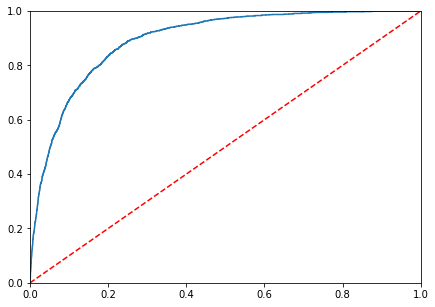

In [271]:
fpr, tpr, threshold = roc_curve(ytest,ypred_lr_prob)
plt.figure(figsize=(7,5))
# plot the ROC curve

plt.plot(fpr, tpr)


# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

print(roc_auc_score(ytest,ypred_lr_prob))
plt.show()

In [272]:
print('Accuracy : ', accuracy_score(ytest,ypred_lr))

Accuracy :  0.9026098496018874


here from all eda, stasts and feature engineering we are getting accuracy score is 90.25% bUT we cant rely on accuracy because of Target class distribution.

* So, we can use confusion matrix

In [273]:
cm = confusion_matrix(ytest,ypred_lr)
cm

array([[11720,   286],
       [ 1035,   523]])

In [274]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [275]:
# RECALL for '0' class 'TNR'
specificity = TN/(TN+FP)
specificity

0.9761785773779776

In [276]:
# RECALL for '1' class 'TPR'
sensitivity = TP/(FN+TP)
sensitivity

0.3356867779204108

From Classification Report we get f1-score
* for 0 class = 0.95
* for 1 class = 0.44

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

Cohen suggested the Kappa result be interpreted as follows: values ≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.

In [277]:
# compute the kappa value
kappa = cohen_kappa_score(ytest, ypred_lr)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.3943567082181517


we can also use Cohen-Kappa-Score as it is robust.

Interpretation: As the kappa score for the full model (with cut-off probability 0.5) is approx 0.4, we can say that there is fair agreement between the actual and predicted values.

### cross validation

In [278]:
import sklearn

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [279]:
from sklearn.model_selection import cross_val_score

In [280]:
scores = cross_val_score(estimator = LogisticRegression(), 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [281]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.42495479 0.45571797 0.4147881  0.41791045 0.43508772]

Minimum score obtained:  0.4148
Maximum score obtained:  0.4557
Average score obtained:  0.4297


### Yuden'Index on Logistic Regression

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [282]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.874840,0.234549,0.096005,0.640290
1,0.879332,0.239380,0.093868,0.639952
2,0.876123,0.236215,0.095316,0.639908
3,0.874198,0.234383,0.096028,0.639815
4,0.872914,0.233217,0.096646,0.639697


As we can see that the optimal cut-off probability is approximately 0.1 . Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.1, then consider it to be 0 else consider it to be 1.

In [283]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.1 else 1 for x in ypred_lr_prob]

In [284]:
cm_yd = confusion_matrix(ytest,y_pred_youden)
cm_yd

array([[9282, 2724],
       [ 213, 1345]])

In [285]:
print("Accuracy : ", accuracy_score(ytest,y_pred_youden))
print('Classification Report : \n', classification_report(ytest,y_pred_youden))

Accuracy :  0.7834709525213801
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.77      0.86     12006
           1       0.33      0.86      0.48      1558

    accuracy                           0.78     13564
   macro avg       0.65      0.82      0.67     13564
weighted avg       0.90      0.78      0.82     13564



In [286]:
# compute the kappa value
kappa_yd = cohen_kappa_score(ytest, y_pred_youden)

# print the kappa value
print('kappa value:',kappa_yd)

kappa value: 0.3740737305050227


**Interpretation**: As the kappa score for the full model (with cut-off probability 0.1) is 0.37 which is less than base model, we can say that there is slightly fair agreement between the actual and predicted values.

## Model Building

In [287]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### *Logistic Regression

In [288]:
print('Training set score: {:.4f}'.format(model.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(model.score(xtest, ytest)))

Training set score: 0.8979
Test set score: 0.9026


In [289]:
# Evaluate Model

lr_eval = evaluate_model(lr, xtest, ytest)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.9026098496018874
Precision: 0.646477132262052
Recall: 0.3356867779204108
F1 Score: 0.44190959019856363
Cohens Kappa Score: 0.3943567082181517
Area Under Curve: 0.8950387878375746
Confusion Matrix:
 [[11720   286]
 [ 1035   523]]


In [290]:
# cross validation

In [291]:
scores = cross_val_score(estimator = LogisticRegression(), 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [292]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.42495479 0.45571797 0.4147881  0.41791045 0.43508772]

Minimum score obtained:  0.4148
Maximum score obtained:  0.4557
Average score obtained:  0.4297


### * Decision Tree

In [293]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(xtrain, ytrain)
ypred_dt = dtc.predict(xtest)

In [294]:
print('Train Accuracy :',  accuracy_score(ytrain, dtc.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_dt))

Train Accuracy : 1.0
-- --- --- --- ---
Test Accuracy : 0.8680330286051312


totally overfitting

In [295]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, xtest, ytest)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8680330286051312
Precision: 0.4305389221556886
Recall: 0.4614890885750963
F1 Score: 0.4454770755885997
Cohens Kappa Score: 0.3706840011288496
Area Under Curve: 0.6911393468862488
Confusion Matrix:
 [[11055   951]
 [  839   719]]


In [296]:
#CV

In [297]:
scores_dt = cross_val_score(estimator = dtc, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [298]:
# print all scores
print('All scores: ', scores_dt)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_dt), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_dt), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_dt), 4))

All scores:  [0.41168478 0.43055556 0.42023346 0.42043222 0.42631579]

Minimum score obtained:  0.4117
Maximum score obtained:  0.4306
Average score obtained:  0.4218



### * Random Forest

In [299]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(xtrain, ytrain)
ypred_rf = rf.predict(xtest)

In [300]:
print('Train Accuracy :',  accuracy_score(ytrain, rf.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_rf))

Train Accuracy : 0.9999684014282555
-- --- --- --- ---
Test Accuracy : 0.9045266882925391


totally overfitting

In [301]:
# Evaluate Model
rf_eval = evaluate_model(rf, xtest, ytest)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9045266882925391
Precision: 0.6424702058504875
Recall: 0.38061617458279845
F1 Score: 0.4780330511890367
Cohens Kappa Score: 0.4292547205933309
Area Under Curve: 0.9069700814975481
Confusion Matrix:
 [[11676   330]
 [  965   593]]


In [302]:
scores_rf = cross_val_score(estimator = rf, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [303]:
# print all scores_rf
print('All scores_rf: ', scores_rf)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_rf), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_rf), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_rf), 4))

All scores_rf:  [0.46193328 0.46297872 0.43463203 0.45238095 0.46843854]

Minimum score obtained:  0.4346
Maximum score obtained:  0.4684
Average score obtained:  0.4561


### * Naive Bayes

In [304]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred_nb = nb.predict(xtest)

In [305]:
print('Train Accuracy :',  accuracy_score(ytrain, nb.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_nb))

Train Accuracy : 0.8191297753341549
-- --- --- --- ---
Test Accuracy : 0.817826599823061


almost same accuracy but value is low

In [306]:
# Evaluate Model
nb_eval = evaluate_model(nb, xtest, ytest)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.817826599823061
Precision: 0.2989872302950242
Recall: 0.43581514762516044
F1 Score: 0.3546617915904936
Cohens Kappa Score: 0.2528632558272247
Area Under Curve: 0.7811161011278699
Confusion Matrix:
 [[10414  1592]
 [  879   679]]


In [307]:
scores_nb = cross_val_score(estimator = nb, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [308]:
# print all scores
print('All scores: ', scores_nb)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_nb), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_nb), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_nb), 4))

All scores:  [0.37543054 0.3659765  0.35868962 0.34875847 0.33958222]

Minimum score obtained:  0.3396
Maximum score obtained:  0.3754
Average score obtained:  0.3577


### * KNN

In [309]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred_knn = knn.predict(xtest)

In [310]:
print('Train Accuracy :',  accuracy_score(ytrain, knn.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_knn))

Train Accuracy : 0.9181912977533415
-- --- --- --- ---
Test Accuracy : 0.8949424948392805


almost same and good value for using.

In [311]:
# Evaluate Model
knn_eval = evaluate_model(knn, xtest, ytest)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8949424948392805
Precision: 0.5706695005313497
Recall: 0.3446726572528883
F1 Score: 0.4297719087635054
Cohens Kappa Score: 0.3757742792663029
Area Under Curve: 0.8204177222471349
Confusion Matrix:
 [[11602   404]
 [ 1021   537]]


In [312]:
scores_knn = cross_val_score(estimator = knn, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [313]:
# print all scores
print('All scores: ', scores_knn)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_knn), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_knn), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_knn), 4))

All scores:  [0.41841004 0.43760399 0.39007699 0.39291737 0.3962585 ]

Minimum score obtained:  0.3901
Maximum score obtained:  0.4376
Average score obtained:  0.4071


italicised text:### **Gradient Boosting**

In [314]:
from sklearn.ensemble import GradientBoostingClassifier

In [315]:
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred_gb = gb.predict(xtest)

In [316]:
print('Train Accuracy :',  accuracy_score(ytrain, gb.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_gb))

Train Accuracy : 0.9069738047840238
-- --- --- --- ---
Test Accuracy : 0.9060011795930404


best fit and good values

In [317]:
# Evaluate Model
gb_eval = evaluate_model(gb, xtest, ytest)

# Print result
print('Accuracy:', gb_eval['acc'])
print('Precision:', gb_eval['prec'])
print('Recall:', gb_eval['rec'])
print('F1 Score:', gb_eval['f1'])
print('Cohens Kappa Score:', gb_eval['kappa'])
print('Area Under Curve:', gb_eval['auc'])
print('Confusion Matrix:\n', gb_eval['cm'])

Accuracy: 0.9060011795930404
Precision: 0.6451282051282051
Recall: 0.4037227214377407
F1 Score: 0.4966442953020134
Cohens Kappa Score: 0.4478170668815019
Area Under Curve: 0.9123450416426362
Confusion Matrix:
 [[11660   346]
 [  929   629]]


In [318]:
# cross validation(k=5) 

In [319]:
scores_gb = cross_val_score(estimator = gb, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [320]:
# print all scores
print('All scores: ', scores_gb)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_gb), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_gb), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_gb), 4))

All scores:  [0.47328244 0.50570962 0.46391753 0.47029289 0.48784441]

Minimum score obtained:  0.4639
Maximum score obtained:  0.5057
Average score obtained:  0.4802


### XG BOOST

In [321]:
from xgboost import XGBClassifier      #conda install -c conda-forge py-xgboost

In [322]:
xgbc = XGBClassifier()
xgbc.fit(xtrain,ytrain)
ypred_xgb = xgbc.predict(xtest)
print("Accuracy Score", accuracy_score(ytest,ypred_xgb))
print("XGBoost classifier - training accuracy", xgbc.score(xtrain,ytrain))
print("XGBoost classifier - testng accuracy", xgbc.score(xtest,ytest))

Accuracy Score 0.9064435269831908
XGBoost classifier - training accuracy 0.9056782633424969
XGBoost classifier - testng accuracy 0.9064435269831908


In [323]:
# Evaluate Model
xgb_eval = evaluate_model(xgbc, xtest, ytest)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.9064435269831908
Precision: 0.658965896589659
Recall: 0.38446726572528883
F1 Score: 0.4856100526955818
Cohens Kappa Score: 0.4380428511393948
Area Under Curve: 0.9152665056004305
Confusion Matrix:
 [[11696   310]
 [  959   599]]


In [324]:
# cross validation

In [325]:
scores_xgb = cross_val_score(estimator = xgbc, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [326]:
# print all scores
print('All scores: ', scores_xgb)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_xgb), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_xgb), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_xgb), 4))

All scores:  [0.45654083 0.49119866 0.46153846 0.45980985 0.47554806]

Minimum score obtained:  0.4565
Maximum score obtained:  0.4912
Average score obtained:  0.4689


### Lightgbm

In [327]:
import lightgbm as lgb

In [328]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(xtrain, ytrain)
ypred_lgbm = lgbm.predict(xtest)

In [329]:
print('Train Accuracy :',  accuracy_score(ytrain, lgbm.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_lgbm))

Train Accuracy : 0.9222991120801339
-- --- --- --- ---
Test Accuracy : 0.9095399587142435


In [330]:
# Evaluate Model
lgbm_eval = evaluate_model(lgbm, xtest, ytest)

# Print result
print('Accuracy:', lgbm_eval['acc'])
print('Precision:', lgbm_eval['prec'])
print('Recall:', lgbm_eval['rec'])
print('F1 Score:', lgbm_eval['f1'])
print('Cohens Kappa Score:', lgbm_eval['kappa'])
print('Area Under Curve:', lgbm_eval['auc'])
print('Confusion Matrix:\n', lgbm_eval['cm'])

Accuracy: 0.9095399587142435
Precision: 0.6519742883379247
Recall: 0.4557124518613607
F1 Score: 0.5364563656970155
Cohens Kappa Score: 0.48807354552597393
Area Under Curve: 0.920338718103507
Confusion Matrix:
 [[11627   379]
 [  848   710]]


In [331]:
# cross validation

In [332]:
scores_lgbm = cross_val_score(estimator = lgbm, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [333]:
# print all scores
print('All scores: ', scores_lgbm)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_lgbm), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_lgbm), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_lgbm), 4))

All scores:  [0.49597424 0.49920509 0.49754501 0.50561798 0.49718423]

Minimum score obtained:  0.496
Maximum score obtained:  0.5056
Average score obtained:  0.4991


## Model Comparison

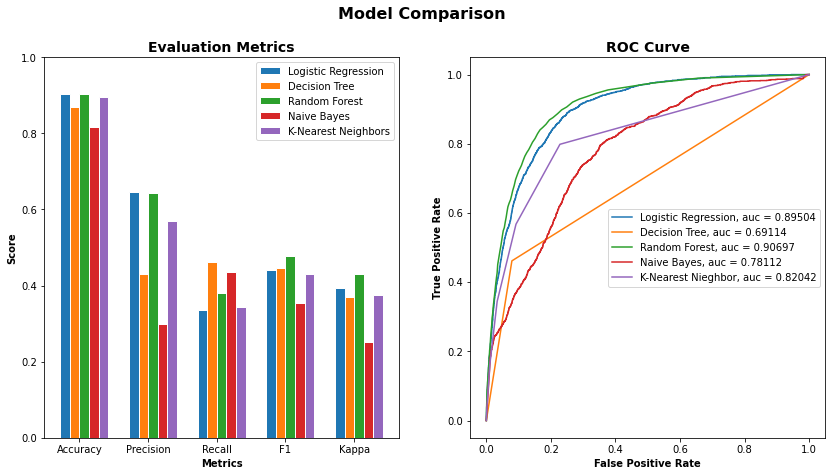

In [334]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.14
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(lr_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(lr_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=5)

plt.show()

### Tabular Form

In [335]:
model=['logistic', 'Decision Tree','Random Forest','Naive Bayes','KNN','Gradient boosting','XGB','LightGBM']

In [336]:
scorecard = pd.DataFrame(index=model)
scorecard['cv']=[np.mean(scores),np.mean(scores_dt),np.mean(scores_rf),np.mean(scores_nb),np.mean(scores_knn),np.mean(scores_gb),np.mean(scores_xgb),np.mean(scores_lgbm)]
scorecard['train acc']=[accuracy_score(ytrain,lr.predict(xtrain)),accuracy_score(ytrain, dtc.predict(xtrain)),accuracy_score(ytrain, rf.predict(xtrain)),accuracy_score(ytrain, nb.predict(xtrain)),accuracy_score(ytrain, knn.predict(xtrain)),accuracy_score(ytrain, gb.predict(xtrain)),accuracy_score(ytrain,xgbc.predict(xtrain)),accuracy_score(ytrain,lgbm.predict(xtrain))]
scorecard['test acc']=[lr_eval['acc'],dtc_eval['acc'],rf_eval['acc'],nb_eval['acc'],knn_eval['acc'],gb_eval['acc'],xgb_eval['acc'],lgbm_eval['acc']]
scorecard['Precsion']=[lr_eval['prec'],dtc_eval['prec'],rf_eval['prec'],nb_eval['prec'],knn_eval['prec'],gb_eval['prec'],xgb_eval['prec'],lgbm_eval['prec']]
scorecard['Recall']=[lr_eval['rec'],dtc_eval['rec'],rf_eval['rec'],nb_eval['rec'],knn_eval['rec'],gb_eval['rec'],xgb_eval['rec'],lgbm_eval['rec']]
scorecard['F1']=[lr_eval['f1'],dtc_eval['f1'],rf_eval['f1'],nb_eval['f1'],knn_eval['f1'],gb_eval['f1'],xgb_eval['f1'],lgbm_eval['f1']]
scorecard['kappa']=[lr_eval['kappa'],dtc_eval['kappa'],rf_eval['kappa'],nb_eval['kappa'],knn_eval['kappa'],gb_eval['kappa'],xgb_eval['kappa'],lgbm_eval['kappa']]
scorecard['AUC']=[lr_eval['auc'],dtc_eval['auc'],rf_eval['auc'],nb_eval['auc'],knn_eval['auc'],gb_eval['auc'],xgb_eval['auc'],lgbm_eval['auc']]

In [337]:
scorecard

,cv,train acc,test acc,Precsion,Recall,F1,kappa,AUC
logistic,0.429692,0.897937,0.902610,0.646477,0.335687,0.441910,0.394357,0.895039
Decision Tree,0.421844,1.000000,0.868033,0.430539,0.461489,0.445477,0.370684,0.691139
Random Forest,0.456073,0.999968,0.904527,0.642470,0.380616,0.478033,0.429255,0.906970
Naive Bayes,0.357687,0.819130,0.817827,0.298987,0.435815,0.354662,0.252863,0.781116
KNN,0.407053,0.918191,0.894942,0.570670,0.344673,0.429772,0.375774,0.820418
Gradient boosting,0.480209,0.906974,0.906001,0.645128,0.403723,0.496644,0.447817,0.912345
XGB,0.468927,0.905678,0.906444,0.658966,0.384467,0.485610,0.438043,0.915267
LightGBM,0.499105,0.922299,0.909540,0.651974,0.455712,0.536456,0.488074,0.920339


# Using smote technique

In [338]:
from collections import Counter
import statsmodels
import statsmodels.api as sm

In [339]:
ytrain.head(2)

38436    0
6566     0
Name: Target, dtype: int64

In [340]:
xc=sm.add_constant(x)

In [341]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(sampling_strategy=0.7,random_state=100)
x_smote, y_smote = smo.fit_resample(xc,y)

In [342]:
x_smote.shape

(67867, 25)

In [343]:
y_smote.value_counts()/len(data)*100

0   88.301520
1   61.810179
Name: Target, dtype: float64

In [344]:
xtrain_sm, xtest_sm, ytrain_sm, ytest_sm = train_test_split(x_smote,y_smote,test_size=0.3, random_state=10)

In [345]:
smote1 = sm.Logit(ytrain_sm, xtrain_sm).fit()

Optimization terminated successfully.
         Current function value: 0.369358
         Iterations 7


In [346]:
print(smote1.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                47506
Model:                          Logit   Df Residuals:                    47481
Method:                           MLE   Df Model:                           24
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.4543
Time:                        09:54:33   Log-Likelihood:                -17547.
converged:                       True   LL-Null:                       -32157.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2794      0.783     -1.634      0.102      -2.814       0.255
age                    -0.0671      0.016     -4.317      0.000      -0.098      -0.037
balance         

In [347]:
from sklearn.linear_model import LogisticRegression
lr_smt = LogisticRegression()
model = lr_smt.fit(xtrain_sm,ytrain_sm)
ypred_lr_sm = model.predict(xtest_sm)

In [348]:
print("Accuracy : ", accuracy_score(ytest_sm,ypred_lr_sm))
print('Classification Report : \n', classification_report(ytest_sm,ypred_lr_sm))

Accuracy :  0.8273169294238987
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85     11900
           1       0.79      0.79      0.79      8461

    accuracy                           0.83     20361
   macro avg       0.82      0.82      0.82     20361
weighted avg       0.83      0.83      0.83     20361



In [349]:
ypred_lr_sm_prob = model.predict_proba(xtest_sm)[:,1]

0.9073579816041769


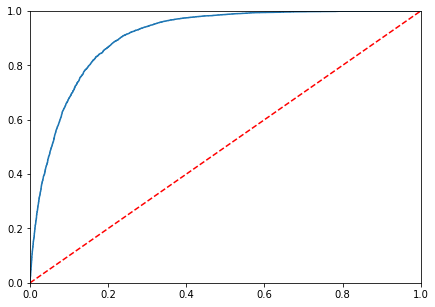

In [350]:
fpr, tpr, threshold = roc_curve(ytest_sm,ypred_lr_sm_prob)
plt.figure(figsize=(7,5))
# plot the ROC curve

plt.plot(fpr, tpr)


# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

print(roc_auc_score(ytest_sm,ypred_lr_sm_prob))
plt.show()

In [351]:
print('Accuracy : ', accuracy_score(ytest_sm,ypred_lr_sm))

Accuracy :  0.8273169294238987


In [352]:
cm_sm = confusion_matrix(ytest_sm,ypred_lr_sm)
cm_sm

array([[10177,  1723],
       [ 1793,  6668]])

In [353]:
TN = cm_sm[0][0]
FP = cm_sm[0][1]
FN = cm_sm[1][0]
TP = cm_sm[1][1]

In [354]:
# RECALL for '0' class 'TNR'
specificity = TN/(TN+FP)
specificity

0.8552100840336134

In [355]:
# RECALL for '1' class 'TPR'
sensitivity = TP/(FN+TP)
sensitivity

0.7880865145963835

# Cohen_kappa_Score

In [356]:
# compute the kappa value
kappa_sm = cohen_kappa_score(ytest_sm, ypred_lr_sm)

# print the kappa value
print('kappa value:',kappa_sm)

kappa value: 0.6440665482463748


**Interpretation:** As the kappa score for the full model with SMOTE is 0.64406, we can say that there is substantial agreement between the actual and predicted values.

# Model Building after smote

### *Logistic Regression

In [357]:
lr_smt = LogisticRegression()
lr_smt.fit(xtrain_sm,ytrain_sm)
ypred_lr_sm = lr_smt.predict(xtest_sm)

In [358]:
print('Train Accuracy :',  accuracy_score(ytrain_sm, lr_smt.predict(xtrain_sm)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest_sm, ypred_lr_sm))

Train Accuracy : 0.8353892139940218
-- --- --- --- ---
Test Accuracy : 0.8273169294238987


almost same and good value

In [359]:
# Evaluate Model

lr_eval_sm = evaluate_model(lr_smt, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', lr_eval_sm['acc'])
print('Precision:', lr_eval_sm['prec'])
print('Recall:', lr_eval_sm['rec'])
print('F1 Score:', lr_eval_sm['f1'])
print('Cohens Kappa Score:', lr_eval_sm['kappa'])
print('Area Under Curve:', lr_eval_sm['auc'])
print('Confusion Matrix:\n', lr_eval_sm['cm'])

Accuracy: 0.8273169294238987
Precision: 0.7946609462519366
Recall: 0.7880865145963835
F1 Score: 0.7913600759553763
Cohens Kappa Score: 0.6440665482463748
Area Under Curve: 0.9073579816041769
Confusion Matrix:
 [[10177  1723]
 [ 1793  6668]]


In [360]:
scores_sm = cross_val_score(estimator = lr_smt, 
                         X = xtrain_sm, 
                         y = ytrain_sm, 
                         cv = 5, 
                         scoring = 'f1')

In [361]:
# print all scores
print('All scores: ', scores_sm)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_sm), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_sm), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_sm), 4))

All scores:  [0.79332049 0.80701754 0.79834326 0.79347547 0.79836338]

Minimum score obtained:  0.7933
Maximum score obtained:  0.807
Average score obtained:  0.7981


## * Descision Tree

In [362]:
from sklearn import tree

# Building Decision Tree model 
dtc_smt = tree.DecisionTreeClassifier(random_state=0)
dtc_smt.fit(xtrain_sm, ytrain_sm)
ypred_dt_sm = dtc_smt.predict(xtest_sm)

In [363]:
print('Train Accuracy :',  accuracy_score(ytrain_sm, dtc_smt.predict(xtrain_sm)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest_sm, ypred_dt_sm))

Train Accuracy : 1.0
-- --- --- --- ---
Test Accuracy : 0.8578655272334365


overfitting

In [364]:
# Evaluate Model
dtc_eval_sm = evaluate_model(dtc_smt, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', dtc_eval_sm['acc'])
print('Precision:', dtc_eval_sm['prec'])
print('Recall:', dtc_eval_sm['rec'])
print('F1 Score:', dtc_eval_sm['f1'])
print('Cohens Kappa Score:', dtc_eval_sm['kappa'])
print('Area Under Curve:', dtc_eval_sm['auc'])
print('Confusion Matrix:\n', dtc_eval_sm['cm'])

Accuracy: 0.8578655272334365
Precision: 0.8207905958280511
Recall: 0.8417444746483868
F1 Score: 0.8311354883883767
Cohens Kappa Score: 0.7084588297777008
Area Under Curve: 0.8555361028704118
Confusion Matrix:
 [[10345  1555]
 [ 1339  7122]]


In [365]:
scores_dt_sm = cross_val_score(estimator = dtc_smt, 
                         X = xtrain_sm, 
                         y = ytrain_sm, 
                         cv = 5, 
                         scoring = 'f1')

In [366]:
# print all scores
print('All scores: ', scores_dt_sm)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_dt_sm), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_dt_sm), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_dt_sm), 4))

All scores:  [0.81479605 0.82739164 0.82391858 0.81299987 0.82601544]

Minimum score obtained:  0.813
Maximum score obtained:  0.8274
Average score obtained:  0.821


## *Random Forest

In [367]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf_smt = RandomForestClassifier(random_state=0)
rf_smt.fit(xtrain_sm, ytrain_sm)
ypred_rf_sm = rf_smt.predict(xtest_sm)

In [368]:
print('Train Accuracy :',  accuracy_score(ytrain_sm, rf_smt.predict(xtrain_sm)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest_sm, ypred_rf_sm))

Train Accuracy : 1.0
-- --- --- --- ---
Test Accuracy : 0.9109572221403663


Overfitting

In [369]:
# Evaluate Model
rf_eval_sm = evaluate_model(rf_smt, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', rf_eval_sm['acc'])
print('Precision:', rf_eval_sm['prec'])
print('Recall:', rf_eval_sm['rec'])
print('F1 Score:', rf_eval_sm['f1'])
print('Cohens Kappa Score:', rf_eval_sm['kappa'])
print('Area Under Curve:', rf_eval_sm['auc'])
print('Confusion Matrix:\n', rf_eval_sm['cm'])

Accuracy: 0.9109572221403663
Precision: 0.8677804824076123
Recall: 0.9269589882992554
F1 Score: 0.896394079661695
Cohens Kappa Score: 0.8184736407935591
Area Under Curve: 0.9729726654874218
Confusion Matrix:
 [[10705  1195]
 [  618  7843]]


In [370]:
scores_rf_sm = cross_val_score(estimator = rf_smt, 
                         X = xtrain_sm, 
                         y = ytrain_sm, 
                         cv = 5, 
                         scoring = 'f1')

In [371]:
# print all scores_rf
print('All scores_rf: ', scores_rf_sm)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_rf_sm), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_rf_sm), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_rf_sm), 4))

All scores_rf:  [0.88783649 0.89561952 0.89115308 0.89352141 0.89155435]

Minimum score obtained:  0.8878
Maximum score obtained:  0.8956
Average score obtained:  0.8919


## *Naive Bayes

In [372]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb_smt = GaussianNB()
nb_smt.fit(xtrain_sm, ytrain_sm)
ypred_nb_sm = nb_smt.predict(xtest_sm)

In [373]:
print('Train Accuracy :',  accuracy_score(ytrain_sm, nb_smt.predict(xtrain_sm)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest_sm, ypred_nb_sm))

Train Accuracy : 0.7555256178166968
-- --- --- --- ---
Test Accuracy : 0.7469672412946319


almost same but values are low 

In [374]:
# Evaluate Model
nb_eval_sm = evaluate_model(nb_smt, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', nb_eval_sm['acc'])
print('Precision:', nb_eval_sm['prec'])
print('Recall:', nb_eval_sm['rec'])
print('F1 Score:', nb_eval_sm['f1'])
print('Cohens Kappa Score:', nb_eval_sm['kappa'])
print('Area Under Curve:', nb_eval_sm['auc'])
print('Confusion Matrix:\n', nb_eval_sm['cm'])

Accuracy: 0.7469672412946319
Precision: 0.6899322695442544
Recall: 0.710317929322775
F1 Score: 0.6999767062660144
Cohens Kappa Score: 0.48128829552065444
Area Under Curve: 0.8075340936516434
Confusion Matrix:
 [[9199 2701]
 [2451 6010]]


In [375]:
scores_nb_sm = cross_val_score(estimator = nb_smt, 
                         X = xtrain_sm, 
                         y = ytrain_sm, 
                         cv = 5, 
                         scoring = 'f1')

In [376]:
# print all scores
print('All scores: ', scores_nb_sm)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_nb_sm), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_nb_sm), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_nb_sm), 4))

All scores:  [0.7047933  0.7163049  0.69899196 0.69420859 0.7109336 ]

Minimum score obtained:  0.6942
Maximum score obtained:  0.7163
Average score obtained:  0.705


## *KNN

In [377]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn_smt = KNeighborsClassifier()
knn_smt.fit(xtrain_sm, ytrain_sm)
ypred_knn_sm = knn_smt.predict(xtest_sm)

In [378]:
print('Train Accuracy :',  accuracy_score(ytrain_sm, knn_smt.predict(xtrain_sm)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest_sm, ypred_knn_sm))

Train Accuracy : 0.9200311539594999
-- --- --- --- ---
Test Accuracy : 0.8813908943568587


not so high difference between the train and test accuracy. Values are also good.

In [379]:
# Evaluate Model
knn_eval_sm = evaluate_model(knn_smt, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', knn_eval_sm['acc'])
print('Precision:', knn_eval_sm['prec'])
print('Recall:', knn_eval_sm['rec'])
print('F1 Score:', knn_eval_sm['f1'])
print('Cohens Kappa Score:', knn_eval_sm['kappa'])
print('Area Under Curve:', knn_eval_sm['auc'])
print('Confusion Matrix:\n', knn_eval_sm['cm'])

Accuracy: 0.8813908943568587
Precision: 0.8052302100161551
Recall: 0.9425599810897057
F1 Score: 0.8684998638714947
Cohens Kappa Score: 0.7616885778023202
Area Under Curve: 0.9457132676968671
Confusion Matrix:
 [[9971 1929]
 [ 486 7975]]


In [380]:
scores_knn_sm = cross_val_score(estimator = knn_smt, 
                         X = xtrain_sm, 
                         y = ytrain_sm, 
                         cv = 5, 
                         scoring = 'f1')

In [381]:
# print all scores
print('All scores: ', scores_knn_sm)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_knn_sm), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_knn_sm), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_knn_sm), 4))

All scores:  [0.86684073 0.86746702 0.86407767 0.86638905 0.86445854]

Minimum score obtained:  0.8641
Maximum score obtained:  0.8675
Average score obtained:  0.8658


## Gradient Boosting

In [382]:
from sklearn.ensemble import GradientBoostingClassifier

In [383]:
gb_smt = GradientBoostingClassifier()
gb_smt.fit(xtrain_sm,ytrain_sm)
ypred_gb_sm = gb_smt.predict(xtest_sm)

In [384]:
print('Train Accuracy :',  accuracy_score(ytrain_sm, gb_smt.predict(xtrain_sm)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest_sm, ypred_gb_sm))

Train Accuracy : 0.876941859975582
-- --- --- --- ---
Test Accuracy : 0.867491773488532


In [385]:
#best fit and good values

In [386]:
# Evaluate Model
gb_eval_sm = evaluate_model(gb_smt, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', gb_eval_sm['acc'])
print('Precision:', gb_eval_sm['prec'])
print('Recall:', gb_eval_sm['rec'])
print('F1 Score:', gb_eval_sm['f1'])
print('Cohens Kappa Score:', gb_eval_sm['kappa'])
print('Area Under Curve:', gb_eval_sm['auc'])
print('Confusion Matrix:\n', gb_eval_sm['cm'])

Accuracy: 0.867491773488532
Precision: 0.8279276203482417
Recall: 0.8598274435645905
F1 Score: 0.8435760667903526
Cohens Kappa Score: 0.7287116032119524
Area Under Curve: 0.9402677087854406
Confusion Matrix:
 [[10388  1512]
 [ 1186  7275]]


In [387]:
scores_gb_sm = cross_val_score(estimator = gb_smt, 
                         X = xtrain_sm, 
                         y = ytrain_sm, 
                         cv = 5, 
                         scoring = 'f1')

In [388]:
# print all scores
print('All scores: ', scores_gb_sm)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_gb_sm), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_gb_sm), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_gb_sm), 4))

All scores:  [0.83706311 0.85432224 0.8501068  0.84643441 0.85564566]

Minimum score obtained:  0.8371
Maximum score obtained:  0.8556
Average score obtained:  0.8487


# XG BOOST

In [389]:
from xgboost import XGBClassifier

In [390]:
xgbc_smt = XGBClassifier()
xgbc_smt.fit(xtrain_sm,ytrain_sm)
ypred_xgb_sm = xgbc_smt.predict(xtest_sm)
print("Accuracy Score", accuracy_score(ytest_sm,ypred_xgb_sm))
print("XGBoost classifier - training accuracy", xgbc_smt.score(xtrain_sm,ytrain_sm))
print("XGBoost classifier - testng accuracy", xgbc_smt.score(xtest_sm,ytest_sm))

Accuracy Score 0.8661657089533913
XGBoost classifier - training accuracy 0.8752999621100492
XGBoost classifier - testng accuracy 0.8661657089533913


In [391]:
# Evaluate Model
xgb_eval_sm = evaluate_model(xgbc_smt, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', xgb_eval_sm['acc'])
print('Precision:', xgb_eval_sm['prec'])
print('Recall:', xgb_eval_sm['rec'])
print('F1 Score:', xgb_eval_sm['f1'])
print('Cohens Kappa Score:', xgb_eval_sm['kappa'])
print('Area Under Curve:', xgb_eval_sm['auc'])
print('Confusion Matrix:\n', xgb_eval_sm['cm'])

Accuracy: 0.8661657089533913
Precision: 0.8209489704565801
Recall: 0.8670369932632077
F1 Score: 0.8433637983560385
Cohens Kappa Score: 0.7266883270180229
Area Under Curve: 0.9378795342744117
Confusion Matrix:
 [[10300  1600]
 [ 1125  7336]]


In [392]:
scores_xgb_sm = cross_val_score(estimator = xgbc_smt, 
                         X = xtrain_sm, 
                         y = ytrain_sm, 
                         cv = 5, 
                         scoring = 'f1')

In [393]:
# print all scores
print('All scores: ', scores_xgb_sm)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_xgb_sm), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_xgb_sm), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_xgb_sm), 4))

All scores:  [0.83853257 0.8531995  0.85141862 0.85000624 0.8537188 ]

Minimum score obtained:  0.8385
Maximum score obtained:  0.8537
Average score obtained:  0.8494


# LIghtGBM

In [394]:
lgbm_smt = lgb.LGBMClassifier()
lgbm_smt.fit(xtrain_sm, ytrain_sm)
ypred_lgbm_sm = lgbm_smt.predict(xtest_sm)

In [395]:
print('Train Accuracy :',  accuracy_score(ytrain_sm, lgbm_smt.predict(xtrain_sm)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest_sm, ypred_lgbm_sm))

Train Accuracy : 0.9194207047530838
-- --- --- --- ---
Test Accuracy : 0.9092382495948136


In [396]:
# Evaluate Model
lgbm_eval_sm = evaluate_model(lgbm_smt, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', lgbm_eval_sm['acc'])
print('Precision:', lgbm_eval_sm['prec'])
print('Recall:', lgbm_eval_sm['rec'])
print('F1 Score:', lgbm_eval_sm['f1'])
print('Cohens Kappa Score:', lgbm_eval_sm['kappa'])
print('Area Under Curve:', lgbm_eval_sm['auc'])
print('Confusion Matrix:\n', lgbm_eval_sm['cm'])

Accuracy: 0.9092382495948136
Precision: 0.8791423001949318
Recall: 0.906157664578655
F1 Score: 0.8924455825864277
Cohens Kappa Score: 0.8139720014155621
Area Under Curve: 0.9737769439415053
Confusion Matrix:
 [[10846  1054]
 [  794  7667]]


In [397]:
scores_lgbm_sm = cross_val_score(estimator = lgbm_smt, 
                         X = xtrain_sm, 
                         y = ytrain_sm, 
                         cv = 5, 
                         scoring = 'f1')

In [398]:
# print all scores
print('All scores: ', scores_lgbm_sm)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_lgbm_sm), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_lgbm_sm), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_lgbm_sm), 4))

All scores:  [0.88511388 0.90024145 0.89217059 0.89762781 0.89262841]

Minimum score obtained:  0.8851
Maximum score obtained:  0.9002
Average score obtained:  0.8936


## *Model comparison* after SMOTE

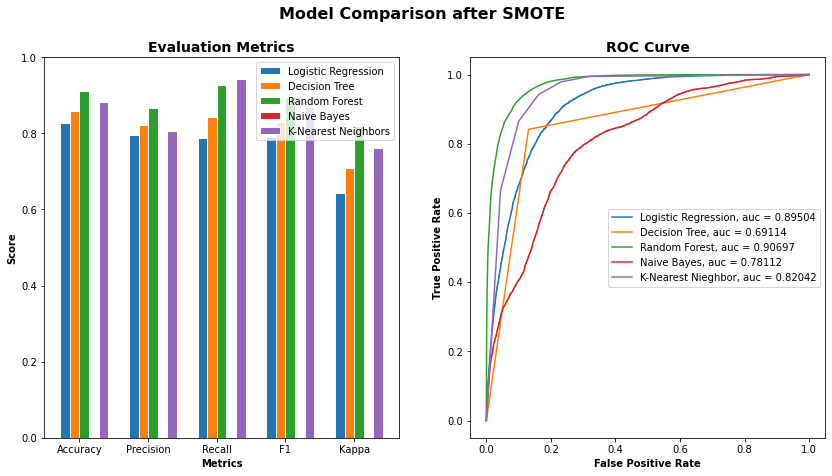

In [399]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison after SMOTE', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.14
lr_score = [lr_eval_sm['acc'], lr_eval_sm['prec'], lr_eval_sm['rec'], lr_eval_sm['f1'], lr_eval_sm['kappa']]
dtc_score = [dtc_eval_sm['acc'], dtc_eval_sm['prec'], dtc_eval_sm['rec'], dtc_eval_sm['f1'], dtc_eval_sm['kappa']]
rf_score = [rf_eval_sm['acc'], rf_eval_sm['prec'], rf_eval_sm['rec'], rf_eval_sm['f1'], rf_eval_sm['kappa']]
nb_score = [nb_eval_sm['acc'], nb_eval_sm['prec'], nb_eval_sm['rec'], nb_eval_sm['f1'], nb_eval_sm['kappa']]
knn_score = [knn_eval_sm['acc'], knn_eval_sm['prec'], knn_eval_sm['rec'], knn_eval_sm['f1'], knn_eval_sm['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(lr_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r4 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(lr_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(lr_eval_sm['fpr'], lr_eval_sm['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(dtc_eval_sm['fpr'], dtc_eval_sm['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval_sm['fpr'], rf_eval_sm['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval_sm['fpr'], nb_eval_sm['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval_sm['fpr'], knn_eval_sm['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=5)

plt.show()

# Scorecard after SMOTE

In [400]:
model1=['logistic', 'Decision Tree','Random Forest','Naive Bayes','KNN','Gradient boosting','XGB','LightGBM']

In [401]:
scorecard_after_SMOTE = pd.DataFrame(index=model1)
scorecard_after_SMOTE['cv']=[np.mean(scores_sm),np.mean(scores_dt_sm),np.mean(scores_rf_sm),np.mean(scores_nb_sm),np.mean(scores_knn_sm),np.mean(scores_gb_sm),np.mean(scores_xgb_sm),np.mean(scores_lgbm_sm)]
#scorecard_after_SMOTE['train acc']=[accuracy_score(ytrain_sm,lr_smt.predict(xtrain_sm)),accuracy_score(ytrain_sm, dtc_smt.predict(xtrain_sm)),accuracy_score(ytrain_sm, rf_smt.predict(xtrain_sm)),accuracy_score(ytrain_sm, nb_smt.predict(xtrain_sm)),accuracy_score(ytrain_sm, knn_smt.predict(xtrain_sm)),accuracy_score(ytrain_sm, gb_smt.predict(xtrain_sm)),accuracy_score(ytrain_sm, xgbc_smt.predict(xtrain_sm),accuracy_score(ytrain_sm,lgbm_smt.predict(xtrain_sm))]
scorecard_after_SMOTE['test acc']=[lr_eval_sm['acc'],dtc_eval_sm['acc'],rf_eval_sm['acc'],nb_eval_sm['acc'],knn_eval_sm['acc'],gb_eval_sm['acc'],xgb_eval_sm['acc'],lgbm_eval_sm['acc']]
scorecard_after_SMOTE['Precsion']=[lr_eval_sm['prec'],dtc_eval_sm['prec'],rf_eval_sm['prec'],nb_eval_sm['prec'],knn_eval_sm['prec'],gb_eval_sm['prec'],xgb_eval_sm['prec'],lgbm_eval_sm['prec']]
scorecard_after_SMOTE['Recall']=[lr_eval_sm['rec'],dtc_eval_sm['rec'],rf_eval_sm['rec'],nb_eval_sm['rec'],knn_eval_sm['rec'],gb_eval_sm['rec'],xgb_eval_sm['rec'],lgbm_eval_sm['rec']]
scorecard_after_SMOTE['F1']=[lr_eval_sm['f1'],dtc_eval_sm['f1'],rf_eval_sm['f1'],nb_eval_sm['f1'],knn_eval_sm['f1'],gb_eval_sm['f1'],xgb_eval_sm['f1'],lgbm_eval_sm['f1']]
scorecard_after_SMOTE['kappa']=[lr_eval_sm['kappa'],dtc_eval_sm['kappa'],rf_eval_sm['kappa'],nb_eval_sm['kappa'],knn_eval_sm['kappa'],gb_eval_sm['kappa'],xgb_eval_sm['kappa'],lgbm_eval_sm['kappa']]
scorecard_after_SMOTE['AUC']=[lr_eval_sm['auc'],dtc_eval_sm['auc'],rf_eval_sm['auc'],nb_eval_sm['auc'],knn_eval_sm['auc'],gb_eval_sm['auc'],xgb_eval_sm['auc'],lgbm_eval_sm['auc']]

In [402]:
scorecard_after_SMOTE

,cv,test acc,Precsion,Recall,F1,kappa,AUC
logistic,0.798104,0.827317,0.794661,0.788087,0.791360,0.644067,0.907358
Decision Tree,0.821024,0.857866,0.820791,0.841744,0.831135,0.708459,0.855536
Random Forest,0.891937,0.910957,0.867780,0.926959,0.896394,0.818474,0.972973
Naive Bayes,0.705046,0.746967,0.689932,0.710318,0.699977,0.481288,0.807534
KNN,0.865847,0.881391,0.805230,0.942560,0.868500,0.761689,0.945713
Gradient boosting,0.848714,0.867492,0.827928,0.859827,0.843576,0.728712,0.940268
XGB,0.849375,0.866166,0.820949,0.867037,0.843364,0.726688,0.937880
LightGBM,0.893556,0.909238,0.879142,0.906158,0.892446,0.813972,0.973777


# Model Optimisation

# Tuning Hyperparamter with GridSearchCV on KNN 

1.   Without SMOTE
2.   With SMOTE



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
param_grid_knn = {'n_neighbors': (1,10,1),
                   'leaf_size': (20,40,1), 'p': (1,2),
                   'weights': ('uniform', 'distance')                  
                  }

grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=param_grid_knn,
    scoring = 'f1',
    n_jobs = -1,
    cv = 5
)
grid_search_KNN.fit(xtrain, ytrain)

grid_search_KNN.best_params_

{'leaf_size': 20, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

In [ ]:
# Select best model with best fit
best_grid_knn = grid_search_KNN.best_estimator_

# Evaluate Model
best_grid_eval_knn = evaluate_model(best_grid_knn, xtest, ytest)

# Print result
print('Accuracy:', best_grid_eval_knn['acc'])
print('Precision:', best_grid_eval_knn['prec'])
print('Recall:', best_grid_eval_knn['rec'])
print('F1 Score:', best_grid_eval_knn['f1'])
print('Cohens Kappa Score:', best_grid_eval_knn['kappa'])
print('Area Under Curve:', best_grid_eval_knn['auc'])
print('Confusion Matrix:\n', best_grid_eval_knn['cm'])

Accuracy: 0.8661161899144795
Precision: 0.4166666666666667
Recall: 0.413992297817715
F1 Score: 0.41532517707662586
Cohens Kappa Score: 0.33972869293417485
Area Under Curve: 0.6693899520073083
Confusion Matrix:
 [[11103   903]
 [  913   645]]


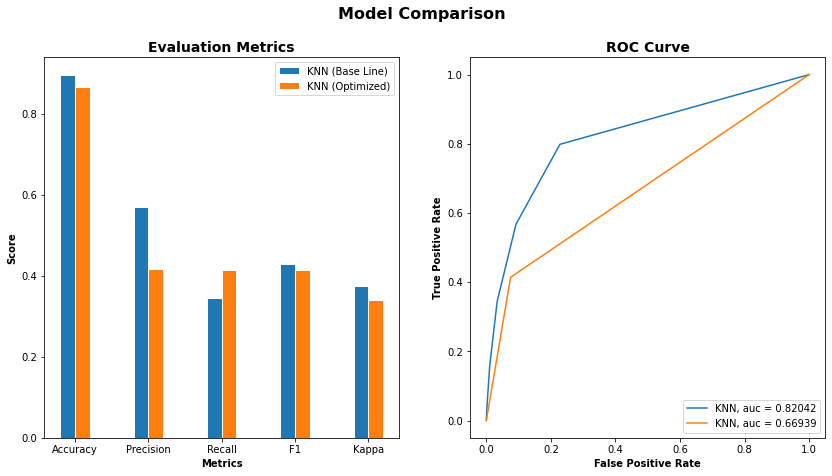

Change of -3.22% on accuracy.
Change of -26.99% on precision.
Change of 20.11% on recall.
Change of -3.36% on F1 score.
Change of -9.59% on Kappa score.
Change of -18.41% on AUC.


In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
best_grid_score_knn = [best_grid_eval_knn['acc'], best_grid_eval_knn['prec'], best_grid_eval_knn['rec'], best_grid_eval_knn['f1'], best_grid_eval_knn['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(knn_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, knn_score, width=barWidth, edgecolor='white', label='KNN (Base Line)')
ax1.bar(r2, best_grid_score_knn, width=barWidth, edgecolor='white', label='KNN (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(knn_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
# Second plot
## Comparing ROC Curve
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='KNN, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(best_grid_eval_knn['fpr'], best_grid_eval_knn['tpr'], label='KNN, auc = {:0.5f}'.format(best_grid_eval_knn['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval_knn['acc'] - knn_eval['acc']) / knn_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval_knn['prec'] - knn_eval['prec']) / knn_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval_knn['rec'] - knn_eval['rec']) / knn_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval_knn['f1'] - knn_eval['f1']) / knn_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval_knn['kappa'] - knn_eval['kappa']) / knn_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval_knn['auc'] - knn_eval['auc']) / knn_eval['auc'])))



In [ ]:
# on SMOTE

In [ ]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
param_grid_knn = {'n_neighbors': (1,10,1),
                   'leaf_size': (20,40,1), 'p': (1,2),
                   'weights': ('uniform', 'distance')
                   }

grid_search_KNN_sm = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=param_grid_knn,
    scoring = 'f1',
    n_jobs = -1,
    cv = 5
)
grid_search_KNN_sm.fit(xtrain_sm, ytrain_sm)

grid_search_KNN_sm.best_params_

{'leaf_size': 20, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [ ]:
# Select best model with best fit
best_grid_knn_sm = grid_search_KNN_sm.best_estimator_

# Evaluate Model
best_grid_eval_knn_sm = evaluate_model(best_grid_knn_sm, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', best_grid_eval_knn_sm['acc'])
print('Precision:', best_grid_eval_knn_sm['prec'])
print('Recall:', best_grid_eval_knn_sm['rec'])
print('F1 Score:', best_grid_eval_knn_sm['f1'])
print('Cohens Kappa Score:', best_grid_eval_knn_sm['kappa'])
print('Area Under Curve:', best_grid_eval_knn_sm['auc'])
print('Confusion Matrix:\n', best_grid_eval_knn_sm['cm'])

Accuracy: 0.9053582829919945
Precision: 0.8438947368421053
Recall: 0.9475239333412127
F1 Score: 0.8927119870831245
Cohens Kappa Score: 0.808555162974739
Area Under Curve: 0.9114510423008585
Confusion Matrix:
 [[10417  1483]
 [  444  8017]]


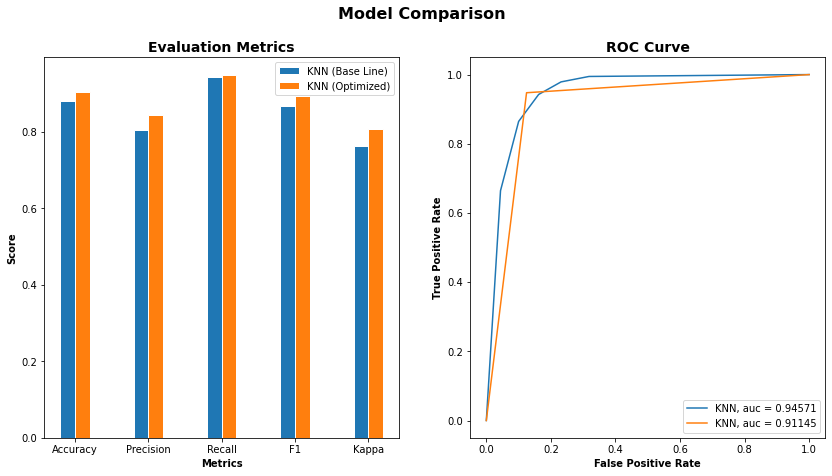

Change of 2.72% on accuracy.
Change of 4.80% on precision.
Change of 0.53% on recall.
Change of 2.79% on F1 score.
Change of 6.15% on Kappa score.
Change of -3.62% on AUC.


In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
knn_score_sm = [knn_eval_sm['acc'], knn_eval_sm['prec'], knn_eval_sm['rec'], knn_eval_sm['f1'], knn_eval_sm['kappa']]
best_grid_score_knn_sm = [best_grid_eval_knn_sm['acc'], best_grid_eval_knn_sm['prec'], best_grid_eval_knn_sm['rec'], best_grid_eval_knn_sm['f1'], best_grid_eval_knn_sm['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(knn_score_sm))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, knn_score_sm, width=barWidth, edgecolor='white', label='KNN (Base Line)')
ax1.bar(r2, best_grid_score_knn_sm, width=barWidth, edgecolor='white', label='KNN (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(knn_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
# Second plot
## Comparing ROC Curve
ax2.plot(knn_eval_sm['fpr'], knn_eval_sm['tpr'], label='KNN, auc = {:0.5f}'.format(knn_eval_sm['auc']))
ax2.plot(best_grid_eval_knn_sm['fpr'], best_grid_eval_knn_sm['tpr'], label='KNN, auc = {:0.5f}'.format(best_grid_eval_knn_sm['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval_knn_sm['acc'] - knn_eval_sm['acc']) / knn_eval_sm['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval_knn_sm['prec'] - knn_eval_sm['prec']) / knn_eval_sm['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval_knn_sm['rec'] - knn_eval_sm['rec']) / knn_eval_sm['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval_knn_sm['f1'] - knn_eval_sm['f1']) / knn_eval_sm['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval_knn_sm['kappa'] - knn_eval_sm['kappa']) / knn_eval_sm['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval_knn_sm['auc'] - knn_eval_sm['auc']) / knn_eval_sm['auc'])))

# Tuning Hyperparamter with GridSearchCV on LOGISTIC Regression 

1.   Without SMOTE
2.   With SMOTE

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,500,1000]}

# Create a base model
lg_grids = LogisticRegression(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=lg_grids, param_grid=param_grid, scoring='f1',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

grid_search.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 1000, 'penalty': 'l2'}

In [ ]:
# Select best model with best fit
best_grid_lr = grid_search.best_estimator_

# Evaluate Model
best_grid_eval_lr = evaluate_model(best_grid_lr, xtest, ytest)

# Print result
print('Accuracy:', best_grid_eval_lr['acc'])
print('Precision:', best_grid_eval_lr['prec'])
print('Recall:', best_grid_eval_lr['rec'])
print('F1 Score:', best_grid_eval_lr['f1'])
print('Cohens Kappa Score:', best_grid_eval_lr['kappa'])
print('Area Under Curve:', best_grid_eval_lr['auc'])
print('Confusion Matrix:\n', best_grid_eval_lr['cm'])

Accuracy: 0.9026098496018874
Precision: 0.6450428396572827
Recall: 0.33825417201540436
F1 Score: 0.4437894736842105
Cohens Kappa Score: 0.396062952210152
Area Under Curve: 0.8951355516080215
Confusion Matrix:
 [[11716   290]
 [ 1031   527]]


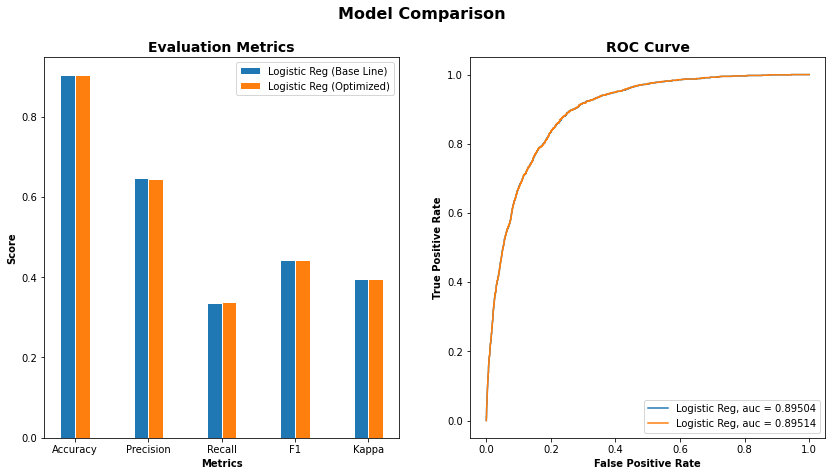

Change of 0.00% on accuracy.
Change of -0.22% on precision.
Change of 0.76% on recall.
Change of 0.43% on F1 score.
Change of 0.43% on Kappa score.
Change of 0.01% on AUC.


In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
best_grid_score_lr = [best_grid_eval_lr['acc'], best_grid_eval_lr['prec'], best_grid_eval_lr['rec'], best_grid_eval_lr['f1'], best_grid_eval_lr['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(lr_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic Reg (Base Line)')
ax1.bar(r2, best_grid_score_lr, width=barWidth, edgecolor='white', label='Logistic Reg (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(lr_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
# Second plot
## Comparing ROC Curve
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Reg, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(best_grid_eval_lr['fpr'], best_grid_eval_lr['tpr'], label='Logistic Reg, auc = {:0.5f}'.format(best_grid_eval_lr['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval_lr['acc'] - lr_eval['acc']) / lr_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval_lr['prec'] - lr_eval['prec']) / lr_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval_lr['rec'] - lr_eval['rec']) / lr_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval_lr['f1'] - lr_eval['f1']) / lr_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval_lr['kappa'] - lr_eval['kappa']) / lr_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval_lr['auc'] - lr_eval['auc']) / lr_eval['auc'])))

In [ ]:
# with SMOTE 

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,500,1000]}

# Create a base model
lg_grids = LogisticRegression(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=lg_grids, param_grid=param_grid, scoring='f1',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xtrain_sm, ytrain_sm)

grid_search.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 0.1, 'penalty': 'l2'}

In [ ]:
# Select best model with best fit
best_grid_lr_sm = grid_search.best_estimator_

# Evaluate Model
best_grid_eval_lr_sm = evaluate_model(best_grid_lr_sm, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', best_grid_eval_lr_sm['acc'])
print('Precision:', best_grid_eval_lr_sm['prec'])
print('Recall:', best_grid_eval_lr_sm['rec'])
print('F1 Score:', best_grid_eval_lr_sm['f1'])
print('Cohens Kappa Score:', best_grid_eval_lr_sm['kappa'])
print('Area Under Curve:', best_grid_eval_lr_sm['auc'])
print('Confusion Matrix:\n', best_grid_eval_lr_sm['cm'])

Accuracy: 0.8274642699278032
Precision: 0.7951562872822715
Recall: 0.7877319465784186
F1 Score: 0.7914267054562727
Cohens Kappa Score: 0.6443155113200107
Area Under Curve: 0.9073221970504309
Confusion Matrix:
 [[10183  1717]
 [ 1796  6665]]


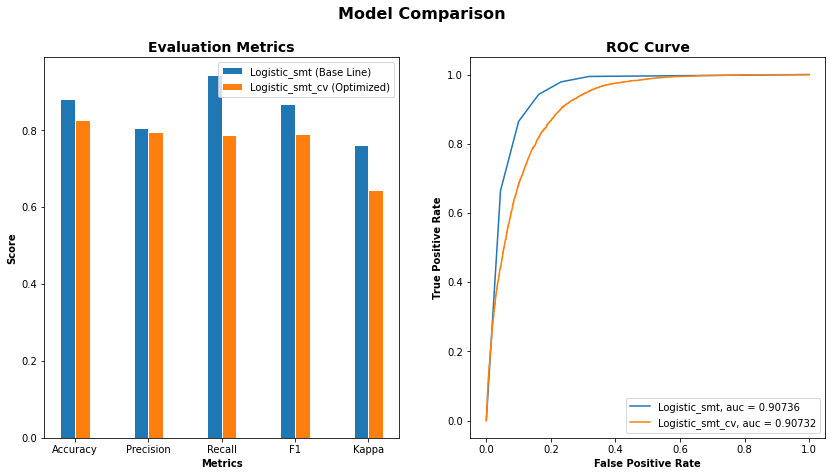

Change of 0.02% on accuracy.
Change of 0.06% on precision.
Change of -0.04% on recall.
Change of 0.01% on F1 score.
Change of 0.04% on Kappa score.
Change of -0.00% on AUC.


In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
lr_score_sm = [lr_eval_sm['acc'], lr_eval_sm['prec'], lr_eval_sm['rec'], lr_eval_sm['f1'], lr_eval_sm['kappa']]
best_grid_score_lr_sm = [best_grid_eval_lr_sm['acc'], best_grid_eval_lr_sm['prec'], best_grid_eval_lr_sm['rec'], best_grid_eval_lr_sm['f1'], best_grid_eval_lr_sm['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(lr_score_sm))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, knn_score_sm, width=barWidth, edgecolor='white', label='Logistic_smt (Base Line)')
ax1.bar(r2, best_grid_score_lr_sm, width=barWidth, edgecolor='white', label='Logistic_smt_cv (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(lr_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
# Second plot
## Comparing ROC Curve
ax2.plot(knn_eval_sm['fpr'], knn_eval_sm['tpr'], label='Logistic_smt, auc = {:0.5f}'.format(lr_eval_sm['auc']))
ax2.plot(best_grid_eval_lr_sm['fpr'], best_grid_eval_lr_sm['tpr'], label='Logistic_smt_cv, auc = {:0.5f}'.format(best_grid_eval_lr_sm['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval_lr_sm['acc'] - lr_eval_sm['acc']) / lr_eval_sm['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval_lr_sm['prec'] - lr_eval_sm['prec']) / lr_eval_sm['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval_lr_sm['rec'] - lr_eval_sm['rec']) / lr_eval_sm['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval_lr_sm['f1'] - lr_eval_sm['f1']) / lr_eval_sm['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval_lr_sm['kappa'] - lr_eval_sm['kappa']) / lr_eval_sm['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval_lr_sm['auc'] - lr_eval_sm['auc']) / lr_eval_sm['auc'])))

# Tuning Hyperparamter with GridSearchCV on XG Boost 

1.   Without SMOTE
2.   With SMOTE

In [ ]:
xg=XGBClassifier(random_state=10)
param_grid = {'n_estimators':np.arange(80,200,10),
              'learning_rate':[0.15,0.16,0.17,0.18,0.19],
              'gamma':(0.5,0.6,0.7,0.8,0.9),
              'max_depth':np.arange(2,10)
              }
grid_search = GridSearchCV(estimator=xg,param_grid=param_grid,cv=5,scoring='f1',n_jobs=-1)


# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

grid_search.best_params_

NameError: ignored

In [ ]:
# Select best model with best fit
best_grid_xgb = grid_search.best_estimator_

# Evaluate Model
best_grid_eval_xgb = evaluate_model(best_grid_xgb, xtest, ytest)

# Print result
print('Accuracy:', best_grid_eval_xgb['acc'])
print('Precision:', best_grid_eval_xgb['prec'])
print('Recall:', best_grid_eval_xgb['rec'])
print('F1 Score:', best_grid_eval_xgb['f1'])
print('Cohens Kappa Score:', best_grid_eval_xgb['kappa'])
print('Area Under Curve:', best_grid_eval_xgb['auc'])
print('Confusion Matrix:\n', best_grid_eval_xgb['cm'])

NameError: ignored

# Tuning HyperParameter with GridSearchCV on LightGBM

1.   without SMOTE
2.   With SMOTE



In [ ]:
estimator_lgbm = lgb.LGBMClassifier()
param_grid_lgbm= {
    'n_estimators': [50, 100,150],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}


grid_search_lgbm= GridSearchCV(estimator=estimator_lgbm, 
                                 param_grid=param_grid_lgbm,
                           n_jobs=-1, cv=5, scoring='f1')

grid_search_lgbm.fit(xtrain,ytrain)

grid_search_lgbm.best_params_

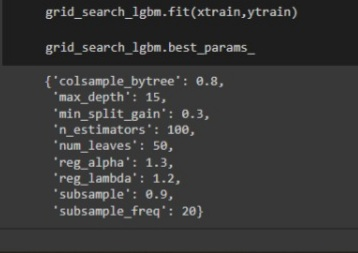

In [ ]:
lgbm_cv1 = lgb.LGBMClassifier(colsample_bytree=0.8,max_depth=15,min_split_gain=0.3,n_estimators=100,num_leaves=50,reg_alpha=1.3,reg_lambda=1.2,subsample=0.9,subsample_freq=20)
lgbm_cv1.fit(xtrain, ytrain)
ypred_lgbm_cv1 = lgbm_cv1.predict(xtest)

In [ ]:
print('Train Accuracy :',  accuracy_score(ytrain, lgbm_cv1.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_lgbm_cv1))

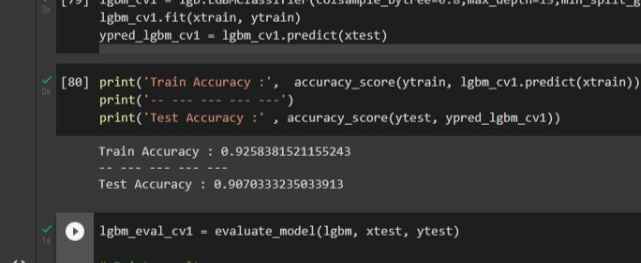

In [ ]:
lgbm_eval_cv1 = evaluate_model(lgbm, xtest, ytest)

# Print result
print('Accuracy:', lgbm_eval_cv1['acc'])
print('Precision:', lgbm_eval_cv1['prec'])
print('Recall:', lgbm_eval_cv1['rec'])
print('F1 Score:', lgbm_eval_cv1['f1'])
print('Cohens Kappa Score:', lgbm_eval_cv1['kappa'])
print('Area Under Curve:', lgbm_eval_cv1['auc'])
print('Confusion Matrix:\n', lgbm_eval_cv1['cm'])

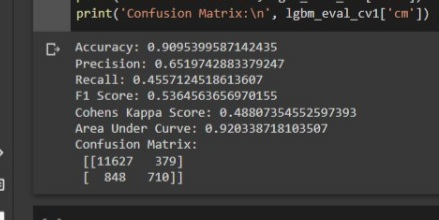

# Tuning Hyperparameter with GridSearchCV on Random Forest

We will use `GridSearchCV` functionality from sklearn to find the optimal parameter for our model. We will provide our baseline model (named `rf_grids`), scoring method (in our case we will use recall as explained before), and also various parameters value we want to try with our model. The `GridSearchCV` function will then iterate through each parameters combination to find the best scoring parameters.

This function also allow us to use cross validation to train our model, where on each iteration our data will be divided into 5 (the number are adjustable from the parameter) fold. The models then will be trained on 4/5 fold of the data leaving the final fold as validation data, this process will be repeated for 5 times until all of our folds are used as validation data.

<div align='center'><img src='https://i.imgur.com/9k60cVA.png' height='200'></div>

To see the result of which parameters combination works best we can access the `best_params_` attribute from our grid search object.

*Note: The more combination provided, the longer the process will take. Alternatively, you can also try `RandomizedSearchCV` to only randomly select specified number of parameters which can result in faster running time.*

In [403]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5,6,10],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 300, 500],
    'criterion':['gini', 'entropy']
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='f1',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

grid_search.best_params_

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50}

In [404]:
# Select best model with best fit
best_grid_rf = grid_search.best_estimator_

# Evaluate Model
best_grid_eval_rf = evaluate_model(best_grid_rf, xtest, ytest)

# Print result
print('Accuracy:', best_grid_eval_rf['acc'])
print('Precision:', best_grid_eval_rf['prec'])
print('Recall:', best_grid_eval_rf['rec'])
print('F1 Score:', best_grid_eval_rf['f1'])
print('Cohens Kappa Score:', best_grid_eval_rf['kappa'])
print('Area Under Curve:', best_grid_eval_rf['auc'])
print('Confusion Matrix:\n', best_grid_eval_rf['cm'])

Accuracy: 0.9051902093777646
Precision: 0.6761658031088082
Recall: 0.33504492939666236
F1 Score: 0.4480686695278969
Cohens Kappa Score: 0.4025972780582938
Area Under Curve: 0.91352919496606
Confusion Matrix:
 [[11756   250]
 [ 1036   522]]


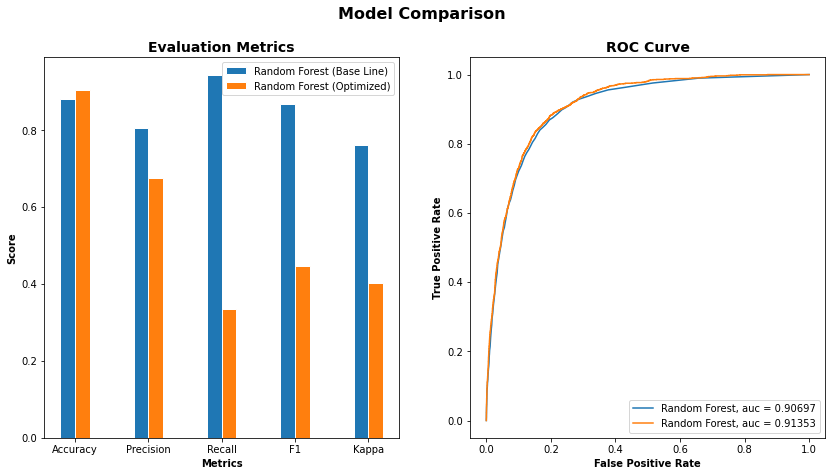

Change of 0.07% on accuracy.
Change of 5.24% on precision.
Change of -11.97% on recall.
Change of -6.27% on F1 score.
Change of -6.21% on Kappa score.
Change of 0.72% on AUC.


In [406]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score_rf = [best_grid_eval_rf['acc'], best_grid_eval_rf['prec'], best_grid_eval_rf['rec'], best_grid_eval_rf['f1'], best_grid_eval_rf['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, knn_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score_rf, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(rf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval_rf['fpr'], best_grid_eval_rf['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval_rf['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval_rf['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval_rf['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval_rf['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval_rf['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval_rf['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval_rf['auc'] - rf_eval['auc']) / rf_eval['auc'])))

In [408]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='f1',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xtrain_sm, ytrain_sm)

grid_search.best_params_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500}

In [410]:
# Select best model with best fit
best_grid_rf_sm = grid_search.best_estimator_

# Evaluate Model
best_grid_eval_rf_sm = evaluate_model(best_grid_rf_sm, xtest_sm, ytest_sm)

# Print result
print('Accuracy:', best_grid_eval_rf_sm['acc'])
print('Precision:', best_grid_eval_rf_sm['prec'])
print('Recall:', best_grid_eval_rf_sm['rec'])
print('F1 Score:', best_grid_eval_rf_sm['f1'])
print('Cohens Kappa Score:', best_grid_eval_rf_sm['kappa'])
print('Area Under Curve:', best_grid_eval_rf_sm['auc'])
print('Confusion Matrix:\n', best_grid_eval_rf_sm['cm'])

Accuracy: 0.8955846962329944
Precision: 0.8510473235065943
Recall: 0.9075759366505142
F1 Score: 0.8784031114161519
Cohens Kappa Score: 0.7870805507627725
Area Under Curve: 0.9628292442139367
Confusion Matrix:
 [[10556  1344]
 [  782  7679]]


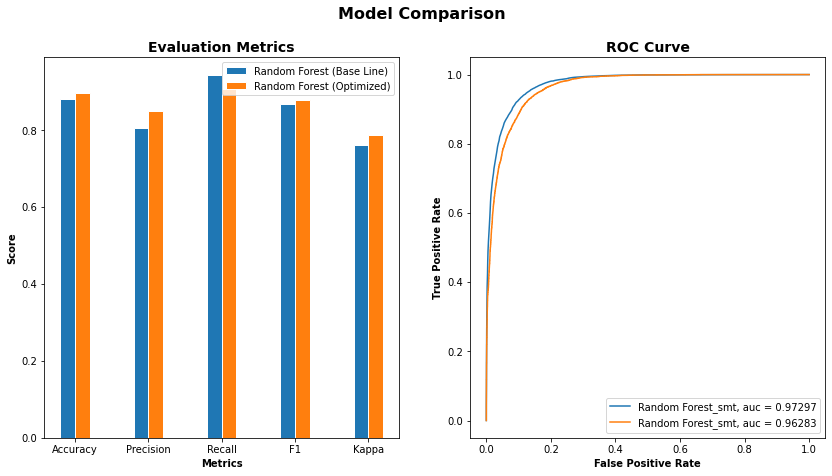

Change of -1.69% on accuracy.
Change of -1.93% on precision.
Change of -2.09% on recall.
Change of -2.01% on F1 score.
Change of -3.84% on Kappa score.
Change of -1.04% on AUC.


In [411]:
#Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score_sm = [rf_eval_sm['acc'], rf_eval_sm['prec'], rf_eval_sm['rec'], rf_eval_sm['f1'], rf_eval_sm['kappa']]
best_grid_score_rf = [best_grid_eval_rf_sm['acc'], best_grid_eval_rf_sm['prec'], best_grid_eval_rf_sm['rec'], best_grid_eval_rf_sm['f1'], best_grid_eval_rf_sm['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score_sm))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, knn_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score_rf, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(rf_score_sm))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval_sm['fpr'], rf_eval_sm['tpr'], label='Random Forest_smt, auc = {:0.5f}'.format(rf_eval_sm['auc']))
ax2.plot(best_grid_eval_rf_sm['fpr'], best_grid_eval_rf_sm['tpr'], label='Random Forest_smt, auc = {:0.5f}'.format(best_grid_eval_rf_sm['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval_rf_sm['acc'] - rf_eval_sm['acc']) / rf_eval_sm['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval_rf_sm['prec'] - rf_eval_sm['prec']) / rf_eval_sm['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval_rf_sm['rec'] - rf_eval_sm['rec']) / rf_eval_sm['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval_rf_sm['f1'] - rf_eval_sm['f1']) / rf_eval_sm['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval_rf_sm['kappa'] - rf_eval_sm['kappa']) / rf_eval_sm['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval_rf_sm['auc'] - rf_eval_sm['auc']) / rf_eval_sm['auc'])))